# Lab 1 - AI and Cybersecurity
Group members:
*   Salvatore Di Franco - s346785
*   Simone Capriolo - s342664
*   Alessandro Pispola - s343720




## Task 1: Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Reading the dataset

df = pd.read_csv('/content/drive/MyDrive/LAB_AI&C/dataset_lab_1.csv')
df

,Flow Duration,Flow IAT Mean,Fwd PSH Flags,Bwd Packet Length Mean,Bwd Packet Length Max,Flow Bytes/s,Down/Up Ratio,SYN Flag Count,Fwd Packet Length Mean,Fwd IAT Std,Packet Length Mean,Fwd Packet Length Max,Subflow Fwd Packets,Flow Packets/s,Total Fwd Packets,Destination Port,Label
0,303376,3.033760e+04,0,749.4,1448,12743.263,0,0,19.833334,98776.15,322.16666,119,6,36.258636,6,443,Benign
1,117,1.170000e+02,0,0.0,0,0.000,1,0,0.000000,0.00,0.00000,0,1,17094.018000,1,52631,Benign
2,142,1.420000e+02,0,0.0,0,84507.040,0,0,6.000000,0.00,6.00000,6,2,14084.507000,2,80,Benign
3,191,6.366667e+01,0,52.0,52,921465.940,1,0,36.000000,0.00,42.40000,36,2,20942.408000,2,53,Benign
4,4,4.000000e+00,0,0.0,0,3000000.000,0,0,6.000000,0.00,6.00000,6,2,500000.000000,2,49467,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31502,5710955,1.903652e+06,0,0.0,0,0.000,0,0,0.000000,4037277.80,0.00000,0,3,0.700408,3,80,Brute Force
31503,5862561,1.954187e+06,0,0.0,0,0.000,0,0,0.000000,4144374.80,0.00000,0,3,0.682296,3,80,Brute Force
31504,5854872,1.951624e+06,0,0.0,0,0.000,0,0,0.000000,4139029.80,0.00000,0,3,0.683192,3,80,Brute Force
31505,5555547,1.851849e+06,0,0.0,0,0.000,0,0,0.000000,3927356.50,0.00000,0,3,0.720001,3,80,Brute Force


### NaN, Infinite values, duplicates handling


In [ ]:
# Dataset general information
print("DATASET INFOS:")
print(df.info())
print(50*"-")
print("\nORIGINAL SHAPE:", df.shape)
print("DATASET SIZE:", df.size, "\n")


DATASET INFOS:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31507 entries, 0 to 31506
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flow Duration           31507 non-null  int64  
 1   Flow IAT Mean           31507 non-null  float64
 2   Fwd PSH Flags           31507 non-null  int64  
 3   Bwd Packet Length Mean  31507 non-null  float64
 4   Bwd Packet Length Max   31507 non-null  int64  
 5   Flow Bytes/s            31487 non-null  float64
 6   Down/Up Ratio           31507 non-null  int64  
 7   SYN Flag Count          31507 non-null  int64  
 8   Fwd Packet Length Mean  31507 non-null  float64
 9   Fwd IAT Std             31507 non-null  float64
 10  Packet Length Mean      31507 non-null  float64
 11  Fwd Packet Length Max   31507 non-null  int64  
 12  Subflow Fwd Packets     31507 non-null  int64  
 13  Flow Packets/s          31507 non-null  float64
 14  Total Fwd Packets      

In [ ]:
# Handling null values, infinite values and duplicates
print("TOTAL NUMBER OF NULL VALUES PER FEATURE:\n",df.isnull().sum())
print(50*"-")

df_inf= df[df.columns[:-1]]
has_infinite = np.isinf(df_inf).sum()
print("\nTOTAL NUMBER OF INFINITE VALUES PER FEATURE:\n", has_infinite, "\n")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(50*"-")
print("\nTOTAL NUMBER OF NULL VALUES PER FEATURE (after inf to null conversion):\n", df.isnull().sum())

print(50*"-")
df = df.dropna()
print("\nSHAPE AFTER DROPPING NULL AND INFINITE VALUES:",df.shape, "\n")


print(50*"-")
print("\nTOTAL NUMBER OF DUPLICATE ROWS:", df.duplicated().sum())
df = df.drop_duplicates()
print("SHAPE after duplicates removal:",df.shape)

TOTAL NUMBER OF NULL VALUES PER FEATURE:
 Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s              20
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflow Fwd Packets        0
Flow Packets/s             0
Total Fwd Packets          0
Destination Port           0
Label                      0
dtype: int64
--------------------------------------------------

TOTAL NUMBER OF INFINITE VALUES PER FEATURE:
 Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s               7
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflo

### Label encoding, stratified split and class proportion

In [ ]:
# Label encoding
direction_mapping = {
    'Benign': 0,
    'PortScan': 1,
    'DoS Hulk': 2,
    'Brute Force': 3
}

print("LABEL VALUES BEFORE LABEL ENCODING:\n", df['Label'], "\n")
df['Label'] = df['Label'].map(direction_mapping)
print(50*"-")
print("\nLABEL VALUES AFTER LABEL ENCODING:\n", df['Label'])


LABEL VALUES BEFORE LABEL ENCODING:
 0             Benign
1             Benign
2             Benign
3             Benign
4             Benign
            ...     
31502    Brute Force
31503    Brute Force
31504    Brute Force
31505    Brute Force
31506    Brute Force
Name: Label, Length: 29386, dtype: object 

--------------------------------------------------

LABEL VALUES AFTER LABEL ENCODING:
 0        0
1        0
2        0
3        0
4        0
        ..
31502    3
31503    3
31504    3
31505    3
31506    3
Name: Label, Length: 29386, dtype: int64


In [ ]:
# Train, validation, test stratified split
X = df[df.columns[:-1]]
y = df['Label'].values

# Setting the seed for repeatability
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)

# 60% train, 40% temp
# By adding stratify=y we're sure to mantain class proportion in each split
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=seed,
                                                    stratify=y)

# 50% validation, 50% test split
X_val, X_test_beforeNormalization, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5,
                                                random_state=seed,
                                                stratify=y_temp)

# Print Shapes
print(f"X_train SHAPE: {X_train.shape}")
print(f"X_val SHAPE:   {X_val.shape}")
print(f"X_test SHAPE:  {X_test_beforeNormalization.shape}", "\n")
print(50*"-")
print(f"\ny_train SHAPE: {y_train.shape}")
print(f"y_val SHAPE:   {y_val.shape}")
print(f"y_test SHAPE:  {y_test.shape}")

X_train SHAPE: (17631, 16)
X_val SHAPE:   (5877, 16)
X_test SHAPE:  (5878, 16) 

--------------------------------------------------

y_train SHAPE: (17631,)
y_val SHAPE:   (5877,)
y_test SHAPE:  (5878,)


In [ ]:
def class_proportion(y, split):
  """
  Calculates and displays the percentage distribution of classes in a dataset.
  Parameters:
  -----------
  y : Array or list containing class labels.
  split : str
      Name or description of the dataset split (e.g., 'train', 'test').
  Returns:
  --------
  None
      Prints a table showing the number and percentage of occurrences for each class.
"""
  # Converting the input in a pd serie to use counts
  y_serie = pd.Series(y, name='Label')

  # Now count the occurrences directly on the Series
  attack_counts_y = y_serie.value_counts().reset_index()
  attack_counts_y.columns = ['label', 'Number of Occurrences']

  # Calculate the total number of occurrences and the percentage for each class
  total_occurrences = attack_counts_y['Number of Occurrences'].sum()
  attack_counts_y['% of Total'] = ((attack_counts_y['Number of Occurrences'] / total_occurrences) * 100).round(2)

  print(f"CLASS DISTRIBUTION IN {split}:")
  print(attack_counts_y, "\n")



In [ ]:
# Print the class proportion
class_proportion(df['Label'], "TOTAL DB")
class_proportion(y_train, "TRAINING SET")
print(50*"-")
class_proportion(y_val, "VALIDATION SET")
print(50*"-")
class_proportion(y_test, "TEST SET")

CLASS DISTRIBUTION IN TOTAL DB:
   label  Number of Occurrences  % of Total
0      0                  19242       65.48
1      1                   4849       16.50
2      2                   3868       13.16
3      3                   1427        4.86 

CLASS DISTRIBUTION IN TRAINING SET:
   label  Number of Occurrences  % of Total
0      0                  11545       65.48
1      1                   2909       16.50
2      2                   2321       13.16
3      3                    856        4.86 

--------------------------------------------------
CLASS DISTRIBUTION IN VALIDATION SET:
   label  Number of Occurrences  % of Total
0      0                   3848       65.48
1      1                    970       16.51
2      2                    773       13.15
3      3                    286        4.87 

--------------------------------------------------
CLASS DISTRIBUTION IN TEST SET:
   label  Number of Occurrences  % of Total
0      0                   3849       65.48
1     

### Outlier handling: standardization

In [ ]:
# Outlier handling
# Calculation of the percentage of outliers for each feature (df) – IQR -> dict with outliers percentage
def calculate_outliers_percentage(df):
    """
    Calculate the percentage of outliers for each feature in the DataFrame using the IQR method.

    Parameters:
    -----------
    df : pandas.DataFrame
        Input DataFrame containing the dataset.

    Returns:
    --------
    dict
        Dictionary containing the percentage of outliers for each feature.

    Notes:
    ------
    - Uses the Interquartile Range (IQR) method to identify outliers.
    - Outliers are defined as values below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
    - The function returns a dictionary with feature names as keys and outlier percentages as values.
    """

    outlier_percentages = {}  # empty dictionary to store outlier percentages

    for column in df.columns:
        Q1 = df[column].quantile(0.25)  # first quartile (Q1) for the column
        Q3 = df[column].quantile(0.75)  # third quartile (Q3) for the column
        IQR = Q3 - Q1  # Interquartile Range (IQR)

        lower_bound = Q1 - 1.5 * IQR  # lower bound for outliers
        upper_bound = Q3 + 1.5 * IQR  # upper bound for outliers

        # Identify outliers in the column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        # Calculate the percentage of outliers for the column
        outlier_percentage = len(outliers) / len(df) * 100

        # Store the outlier percentage in the dictionary
        outlier_percentages[column] = outlier_percentage

    return outlier_percentages

<Figure size 1500x1000 with 0 Axes>

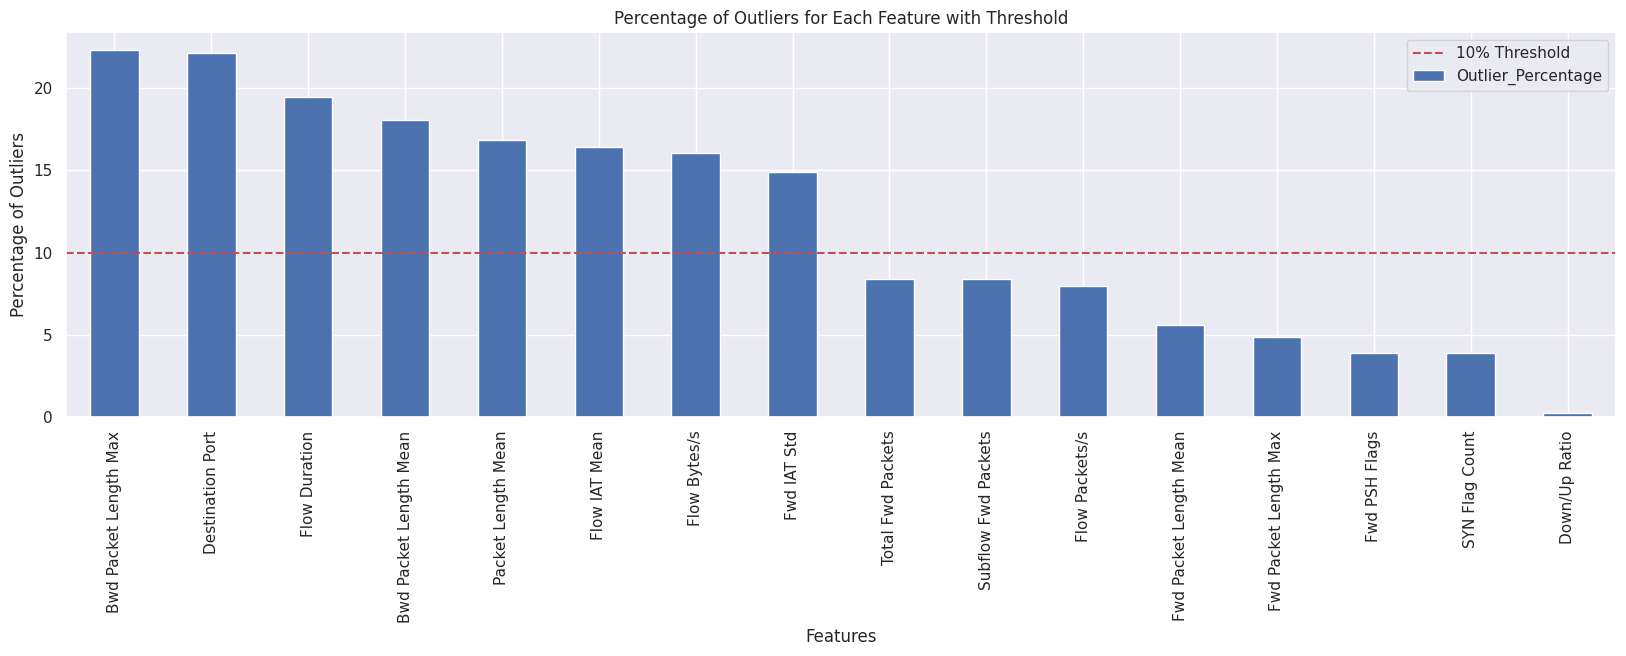

In [ ]:
# Calculate outliers percentage using both training and validation set
df_combine = pd.concat([X_train, X_val], ignore_index=True)
outlier_percentages = calculate_outliers_percentage(df_combine)

# Convert outlier_percentages dictionary to DataFrame for easier manipulation
outliers_df = pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier_Percentage'])

# Define the threshold for concern
threshold = 10

# Identify features with high percentage of outliers
high_outlier_features = outliers_df[outliers_df['Outlier_Percentage'] > threshold]

# Plot the outlier percentages and highlight features above the threshold
plt.figure(figsize=(15, 10))
outliers_df.sort_values(by='Outlier_Percentage', ascending=False).plot(kind='bar', legend=False, figsize=(20, 5))
plt.axhline(y=threshold, color='r', linestyle='--', label=f'{threshold}% Threshold')
plt.xlabel('Features')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers for Each Feature with Threshold')
plt.legend()
plt.show()

In [ ]:
# Print the feature with the higher outlier percentage
sorted_outliers_df = outliers_df.sort_values(by='Outlier_Percentage', ascending=False)
top_8_features = sorted_outliers_df.head(8)
print("TOP 8 FEATURES WITH HIGHER OUTLIER PERCENTAGE:")
print(top_8_features)

top_8_feature_names = top_8_features.index.tolist()
#print("\nTOP 8 FEATURES WITH HIGHER OUTLIER PERCENTAGE (list of names):")
#print(top_8_feature_names)

TOP 8 FEATURES WITH HIGHER OUTLIER PERCENTAGE:
                        Outlier_Percentage
Bwd Packet Length Max            22.277523
Destination Port                 22.115875
Flow Duration                    19.478475
Bwd Packet Length Mean           18.070444
Packet Length Mean               16.841075
Flow IAT Mean                    16.428450
Flow Bytes/s                     16.024332
Fwd IAT Std                      14.880041


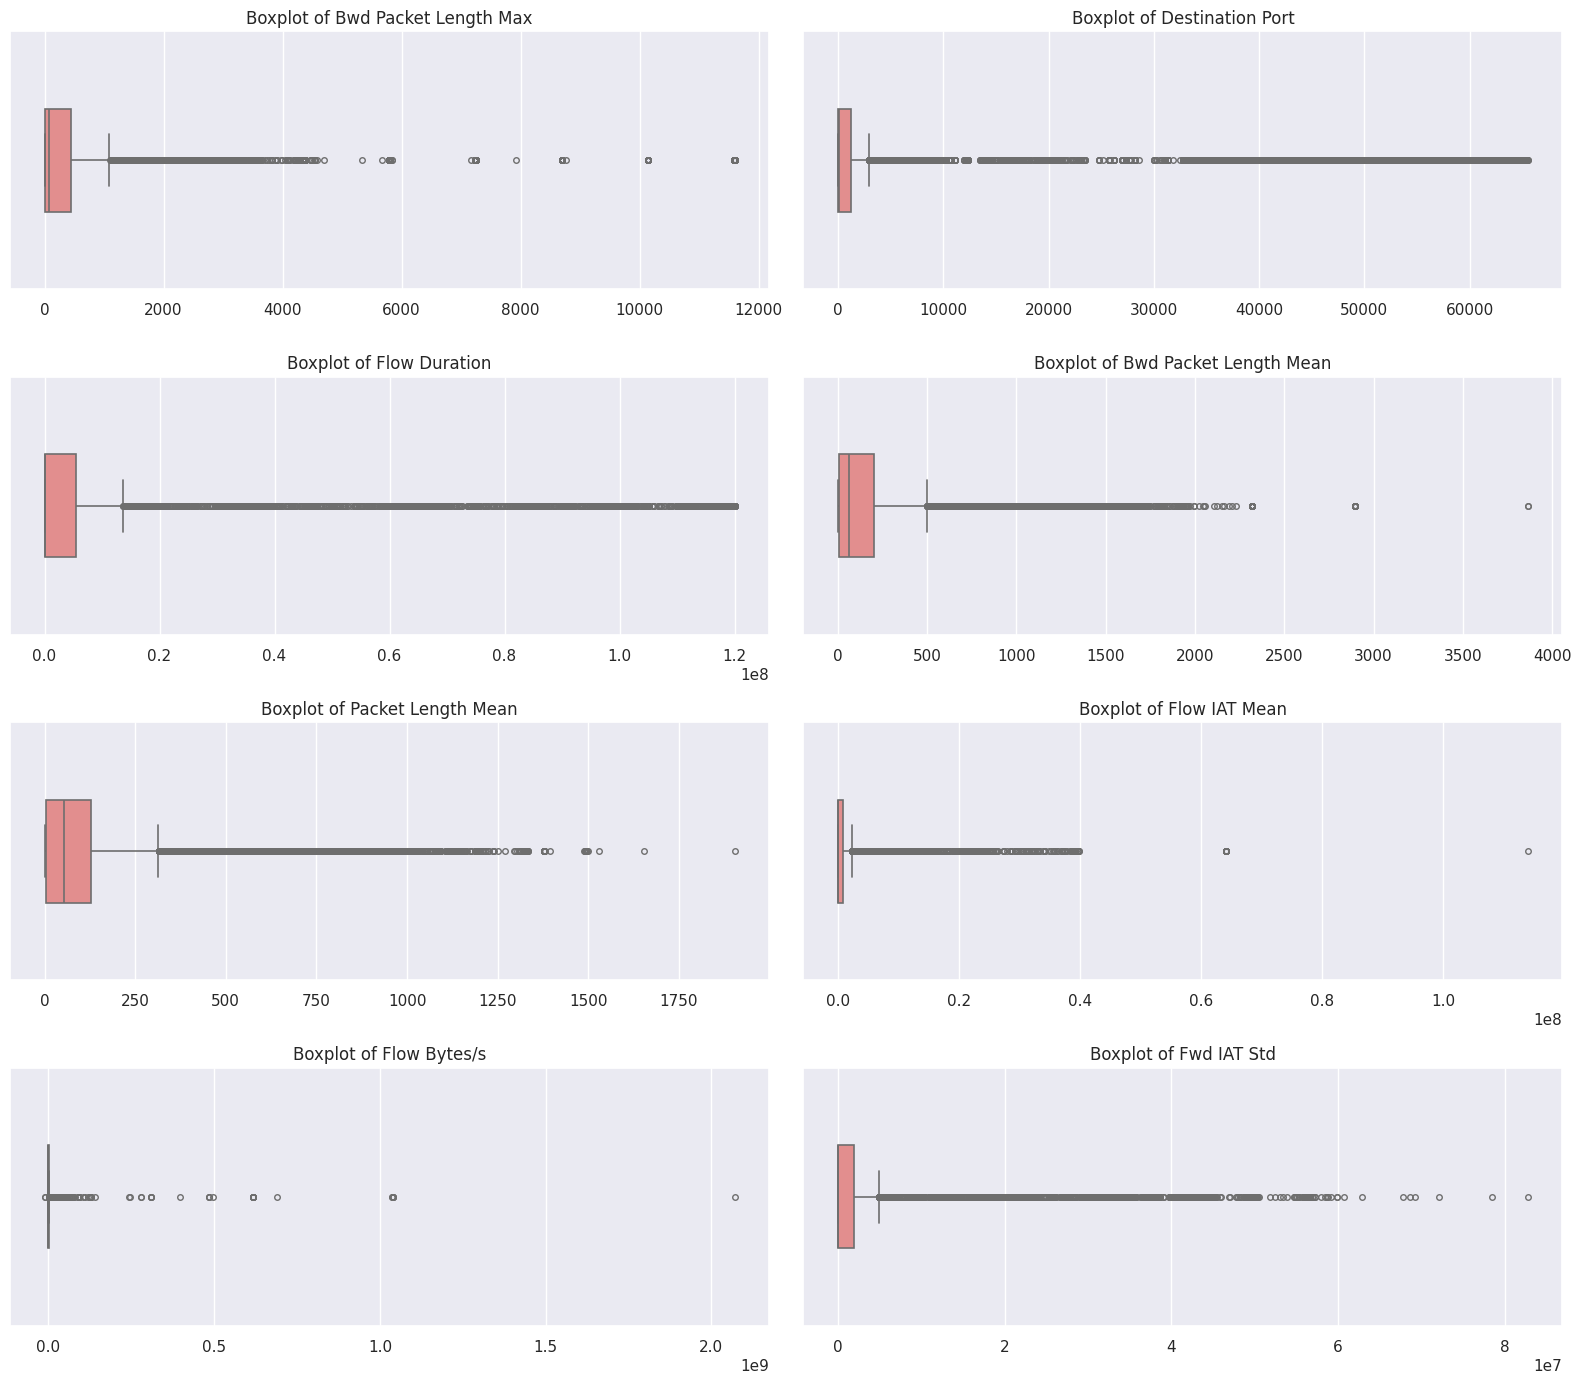

In [ ]:
# Box plot to verify the presence of outliers
df_out = df_combine[top_8_feature_names]

sns.set(style="darkgrid")

# Create a 4x2 grid of subplots (8 total — one for each feature)
fig, axs = plt.subplots(4, 2, figsize=(16, 14))
axs = axs.flatten()

# Loop through each feature and create a boxplot
for i, c in enumerate(df_out.columns):
    axs[i].set_title(f"Boxplot of {c}", fontsize=12)

    # Create a boxplot for each feature
    sns.boxplot(
        data=df_out,
        x=c,
        color="lightcoral",
        ax=axs[i],
        fliersize=4,         # Size of the outlier points
        linewidth=1.2,       # Thickness of boxplot lines
        width=0.4            # Width of the box
    )

    # Remove the x-axis label for a cleaner look
    axs[i].set_xlabel("")

# Show plots
plt.tight_layout()
plt.show()
plt.close()

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test_beforeNormalization)

In [ ]:
# Tensor creation
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

## Task 2: Shallow Neural Network

In [ ]:
# Shallow NN linear model definition
class ShallowNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [ ]:
def training_loop(model, train_loader, val_loader, train_dataset, val_dataset, optimizer, criterion, num_epochs, min_delta = None, patience = None, neurons = None):
    """
    Define training parameters
    Train the model for a specified number of epochs and track the training and validation losses.

    Args:
        model: The neural network model to be trained.
        train_loader: DataLoader for the training dataset.
        val_loader: DataLoader for the validation dataset.
        train_dataset: The entire training dataset.
        val_dataset: The entire validation dataset.
        device: Device to run the model on (CPU or GPU).
        optimizer: The optimization algorithm to use for updating model parameters.
        criterion: The loss function to use for computing the loss.
        num_epochs: The number of training epochs.
        neurons: The number of neurons for the hidden layer.

    Returns:
        None: The function plots the training and validation loss over the epochs.
    """


    # Record the start time
    start_time = time.time()

    train_losses = []
    val_losses = []

    best_val_loss = float('inf')
    trigger_times = 0     # how many epochs since last improvement
    best_model_state = None
    # Training loop
    for epoch in range(num_epochs):  # Train for epochs
        train_loss = 0
        val_loss = 0
        model.train()  # Set model to training mode
        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()  # Clear previous gradients
            outputs = model(batch_X)  # Forward pass
            loss = criterion(outputs, batch_y)  # Compute loss
            loss.backward()  # Backpropagation
            optimizer.step()  # Update model parameters
            train_loss += loss.item() * batch_X.size(0)
        train_loss /= len(train_dataset)
        train_losses.append(train_loss)  # Store training loss

        # Compute Validation loss during training
        model.eval()  # Set model to evaluation mode
        with torch.no_grad():  # Disable gradient computation for validation
            for batch_X, batch_y in val_loader:
                val_outputs = model(batch_X)  # Forward pass
                loss = criterion(val_outputs, batch_y)  # Compute validation loss
                val_loss += loss.item() * batch_X.size(0)
            val_loss /= len(val_dataset)
            val_losses.append(val_loss)  # Store validation loss
        if (epoch + 1) % 20 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

        # ---- Early Stopping ----
        if(min_delta!= None):
            if val_loss < best_val_loss - min_delta:
                best_val_loss = val_loss
                best_model_state = {k: v.cpu().clone() for k, v in model.state_dict().items()}
                trigger_times = 0
            else:
                trigger_times += 1
                if trigger_times >= patience:
                    print(f"Early stopping at epoch {epoch+1} (best val loss: {best_val_loss:.6f})")
                    break

    # ---- Restore best model ----
    if best_model_state is not None:
        model.load_state_dict(best_model_state)

    # Record the end time
    end_time = time.time()
    # Calculate the elapsed time
    elapsed_time = end_time - start_time
    print(f'The function took {elapsed_time:.4f} seconds to execute.')

    # Plot the training and validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    if neurons is not None:
        plt.title(f'Training and Validation Loss with {neurons} neurons')
    else:
        plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

    return


### Shallow Neural Network with 32 hidden neurons:



In [ ]:
# Tensordataset creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader creation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Early stopping parameters initialization
min_delta = 0.00001
patience = 20

In [ ]:
# Model, loss function, and optimizer initialization
model_32 = ShallowNN(16, 32, 4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_32.parameters(), lr=0.0005)

Epoch 20/100, Train Loss: 0.3281, Val Loss: 0.3220
Epoch 40/100, Train Loss: 0.3101, Val Loss: 0.3020
Epoch 60/100, Train Loss: 0.2998, Val Loss: 0.2955
Epoch 80/100, Train Loss: 0.2939, Val Loss: 0.2873
Epoch 100/100, Train Loss: 0.2892, Val Loss: 0.2811
The function took 50.4628 seconds to execute.


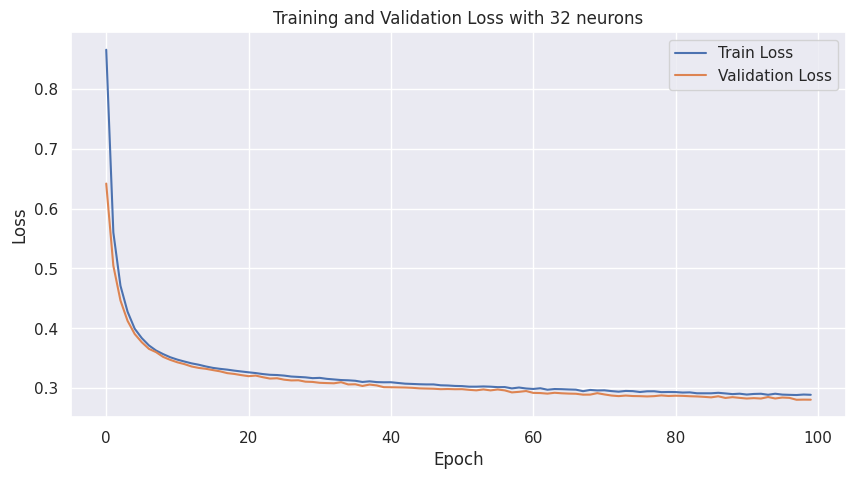

In [ ]:
# Number of epochs and neurons initialization
num_epochs = 100
neurons = 32

# Model training and validation
training_loop(model_32,train_loader, val_loader, train_dataset, val_dataset,optimizer, criterion, num_epochs, min_delta, patience, neurons)

### Shallow Neural Network with 64 hidden neurons:

In [ ]:
## Second model with 64 Neurons per Layer
model_64 = ShallowNN(16, 64, 4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_64.parameters(), lr=0.0005)


Epoch 20/100, Train Loss: 0.3217, Val Loss: 0.3141
Epoch 40/100, Train Loss: 0.3043, Val Loss: 0.2953
Epoch 60/100, Train Loss: 0.2956, Val Loss: 0.2928
Epoch 80/100, Train Loss: 0.2915, Val Loss: 0.2836
Epoch 100/100, Train Loss: 0.2862, Val Loss: 0.2788
The function took 50.4695 seconds to execute.


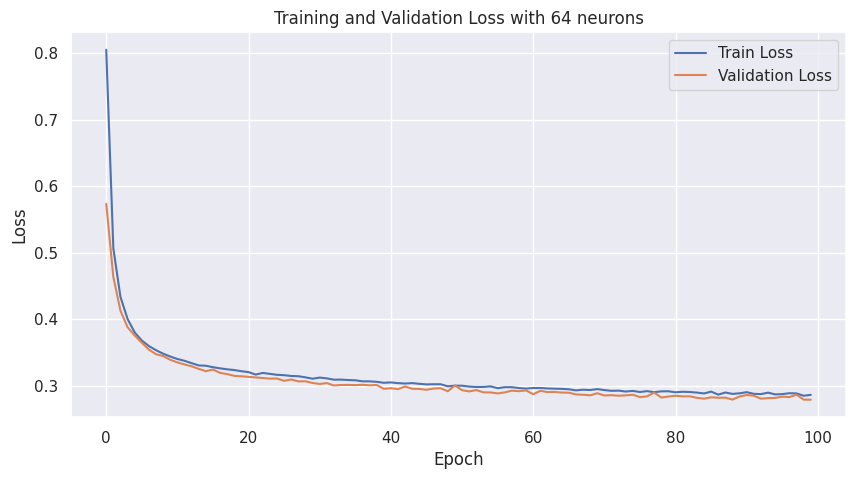

In [ ]:
# Number of epochs and neurons initialization
num_epochs = 100
neurons = 64

# Model training and validation
training_loop(model_64,train_loader, val_loader, train_dataset, val_dataset,optimizer, criterion, num_epochs, min_delta, patience, neurons)

### Shallow Neural Network with 128 hidden neurons:

In [ ]:
## Third model with 64 Neurons per Layer
model_128 = ShallowNN(16, 128, 4)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_128.parameters(), lr=0.0005)

Epoch 20/100, Train Loss: 0.3151, Val Loss: 0.3045
Epoch 40/100, Train Loss: 0.3014, Val Loss: 0.2948
Epoch 60/100, Train Loss: 0.2904, Val Loss: 0.2867
Epoch 80/100, Train Loss: 0.2871, Val Loss: 0.2773
Epoch 100/100, Train Loss: 0.2837, Val Loss: 0.2741
The function took 51.3060 seconds to execute.


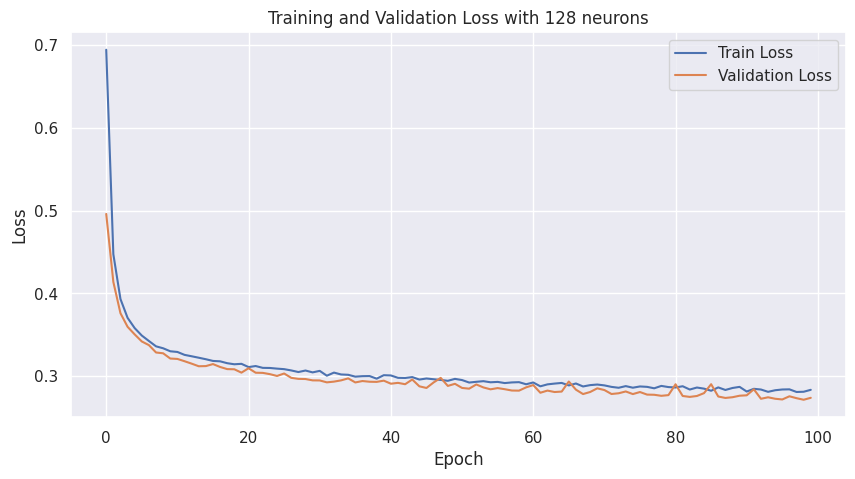

In [ ]:
# Number of epochs and neurons initialization
num_epochs = 100
neurons = 128

# Model training and validation
training_loop(model_128,train_loader, val_loader, train_dataset, val_dataset,optimizer, criterion, num_epochs, min_delta, patience, neurons)

### Classification report generation

In [ ]:
# Function to compute the validation report
def generate_classification_report(model, loader, class_names):
    """
    Create and print the classification report for a given model and dataset.

    Args:
        model: trained PyTorch model.
        loader: Dataloder with validation set.
        class_names: List of labels (in the correct order).
    """
    all_preds = []
    all_labels = []

    # Set the model in evaluation mode
    model.eval()

    # Disable gradient computation
    with torch.no_grad():
        for batch_X, batch_y in loader:
            # Perform forward pass
            outputs = model(batch_X)

            # Get predictions taking the index of the max value
            _, preds = torch.max(outputs, 1)

            # Add predictions to lists
            all_preds.extend(preds.numpy())
            all_labels.extend(batch_y.numpy())

    # Print the classification report
    print(classification_report(all_labels, all_preds, target_names=class_names))

In [ ]:
# Class names
class_names = ['Benign', 'PortScan', 'DoS Hulk', 'Brute Force']

# First model classification report generation
print("--- Classification Report - ShallowNN with 32 hidden neurons (Validation Set) ---")
generate_classification_report(model_32, val_loader, class_names=class_names)

# second model classification report generation
print("\n--- Classification Report - ShallowNN with 64 hidden neurons (Validation Set) ---")
generate_classification_report(model_64, val_loader, class_names=class_names)

# third model classification report generation
print("\n--- Classification Report - ShallowNN with 128 hidden neurons (Validation Set) ---")
generate_classification_report(model_128, val_loader, class_names=class_names)

--- Classification Report - ShallowNN with 32 hidden neurons (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.89      0.96      0.92      3848
    PortScan       0.87      0.91      0.89       970
    DoS Hulk       0.99      0.87      0.93       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.90      5877
   macro avg       0.69      0.68      0.68      5877
weighted avg       0.85      0.90      0.87      5877


--- Classification Report - ShallowNN with 64 hidden neurons (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.89      0.96      0.92      3848
    PortScan       0.82      0.89      0.86       970
    DoS Hulk       0.99      0.87      0.93       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.89      5877
   macro avg       0.68      0.68      0.68      5877
weighted avg       0

In [ ]:
## Classification report of the test set using model_64
print("\n--- Classification Report - ShallowNN with 64 hidden neurons (Test Set) ---")
generate_classification_report(model_64, test_loader, class_names=class_names)


--- Classification Report - ShallowNN with 64 hidden neurons (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.89      0.95      0.92      3849
    PortScan       0.80      0.88      0.84       970
    DoS Hulk       0.99      0.87      0.93       774
 Brute Force       0.00      0.00      0.00       285

    accuracy                           0.88      5878
   macro avg       0.67      0.68      0.67      5878
weighted avg       0.85      0.88      0.86      5878



### Introducing non-linearity



In [ ]:
# ShallowReLuNN model definition
class ShallowReLuNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowReLuNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Epoch 20/100, Train Loss: 0.1635, Val Loss: 0.1618
Epoch 40/100, Train Loss: 0.1427, Val Loss: 0.1427
Epoch 60/100, Train Loss: 0.1324, Val Loss: 0.1334
Epoch 80/100, Train Loss: 0.1252, Val Loss: 0.1268
Epoch 100/100, Train Loss: 0.1195, Val Loss: 0.1210
The function took 66.6716 seconds to execute.


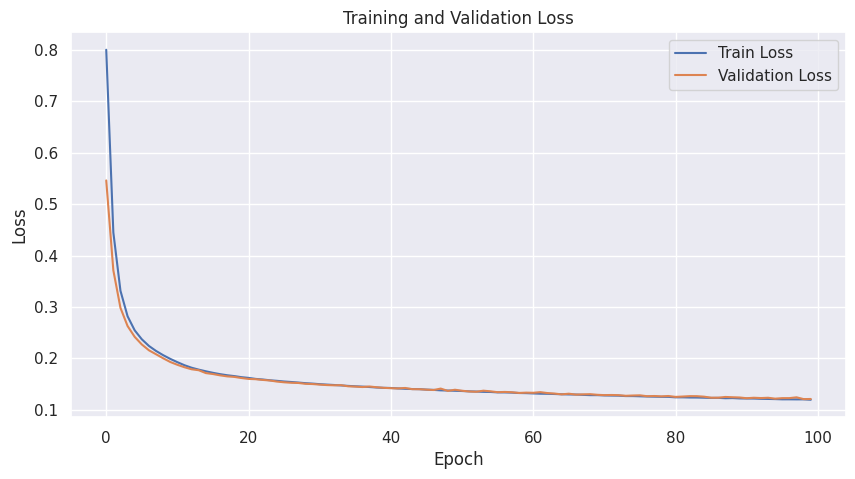

In [ ]:
# Number of epochs and neurons initialization
num_epochs = 100
best_hidden_size = 64

# ReLU model initialization
model_relu = ShallowReLuNN(16, best_hidden_size, 4)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_relu.parameters(), lr=0.0005)

# Model training and validation
training_loop(model_relu, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)


In [ ]:
# model_relu classification report generation (validation)
print("\n--- Classification Report - ShallowReLuNN with 64 hidden neurons (Validation Set) ---")
generate_classification_report(model_relu, val_loader, class_names=class_names)

# model_relu classification report generation (test)
print("\n--- Classification Report - ShallowReLuNN with 64 hidden neurons (Test Set) ---")
generate_classification_report(model_relu, test_loader, class_names=class_names)


--- Classification Report - ShallowReLuNN with 64 hidden neurons (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.96      0.97      3848
    PortScan       0.93      0.93      0.93       970
    DoS Hulk       0.98      0.91      0.95       773
 Brute Force       0.81      0.97      0.88       286

    accuracy                           0.95      5877
   macro avg       0.92      0.94      0.93      5877
weighted avg       0.95      0.95      0.95      5877


--- Classification Report - ShallowReLuNN with 64 hidden neurons (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96      3849
    PortScan       0.92      0.92      0.92       970
    DoS Hulk       0.99      0.91      0.95       774
 Brute Force       0.77      0.95      0.85       285

    accuracy                           0.95      5878
   macro avg       0.91      0.94      0.92      5878
weighted avg     

## Task 3: The impact of Specific Features


### The 'Destination Port' Bias

In [ ]:
# Replace port 80 with 8080 for brute force just in the Test Set --> X_test_beforeNormalization

#Set the exact name of the feature and the corresponding econding
PORT_COLUMN_NAME = 'Destination Port'
BRUTE_FORCE_LABEL = 3

# Horizontal merge of X_test and y_test
y_test_series = pd.Series(y_test, index=X_test_beforeNormalization.index, name='Label')

# Use axis=1 to place columns side by side
test_df_combined = pd.concat([X_test_beforeNormalization, y_test_series], axis=1).copy()

# Define and combine the conditions
condition1 = test_df_combined[PORT_COLUMN_NAME] == 80
condition2 = test_df_combined['Label'] == BRUTE_FORCE_LABEL
combined_condition = condition1 & condition2

# Replace
test_df_combined.loc[combined_condition, PORT_COLUMN_NAME] = 8080

# Remove the label column from X_test
X_test_modified = test_df_combined[test_df_combined.columns[:-1]]

# Apply scaling
X_test_scaled_modified = scaler.transform(X_test_modified)

X_test_tensor_modified = torch.tensor(X_test_scaled_modified, dtype=torch.float32)

# Create the modified test dataset and DataLoader
test_dataset_modified = TensorDataset(X_test_tensor_modified, y_test_tensor)
test_loader_modified = DataLoader(test_dataset_modified, batch_size=64, shuffle=False)

In [ ]:
# model_relu classification report generation (test modified)
print("\n--- Classification Report per ShallowReLuNN con 64 neuroni (Test Set modified) ---")
generate_classification_report(model_relu, test_loader_modified, class_names=class_names)



--- Classification Report per ShallowReLuNN con 64 neuroni (Test Set modified) ---
              precision    recall  f1-score   support

      Benign       0.90      0.96      0.93      3849
    PortScan       0.92      0.92      0.92       970
    DoS Hulk       0.99      0.91      0.95       774
 Brute Force       0.15      0.05      0.07       285

    accuracy                           0.90      5878
   macro avg       0.74      0.71      0.72      5878
weighted avg       0.88      0.90      0.89      5878



### Removing feature 'Destination Port' from DB

In [ ]:
# Reading dataset
df = pd.read_csv('/content/drive/MyDrive/LAB_AI&C/dataset_lab_1.csv')
print("Original shape:", df.shape)

df.drop(columns=['Destination Port'], inplace=True)
print("Shape after 'Destination Port' drop:", df.shape)


Original shape: (31507, 17)
Shape after 'Destination Port' drop: (31507, 16)


In [ ]:
# Re-doing Prepocessing: handling null values, infinite values and duplicates
print("TOTAL NUMBER OF NULL VALUES PER FEATURE:\n",df.isnull().sum())
print(50*"-")

df_inf= df[df.columns[:-1]]
has_infinite = np.isinf(df_inf).sum()
print("\nTOTAL NUMBER OF INFINITE VALUES PER FEATURE:\n", has_infinite, "\n")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
print(50*"-")
print("\nTOTAL NUMBER OF NULL VALUES PER FEATURE (after inf to null conversion):\n", df.isnull().sum())

print(50*"-")
df = df.dropna()
print("\nSHAPE AFTER DROPPING NULL AND INFINITE VALUES:",df.shape, "\n")

print(50*"-")
print("\nTOTAL NUMBER OF DUPLICATE ROWS:", df.duplicated().sum())
df = df.drop_duplicates()
print("SHAPE after duplicates removal:",df.shape)

# Label encoding
direction_mapping = {
   'Benign': 0,
   'PortScan': 1,
   'DoS Hulk': 2,
   'Brute Force': 3
}

print("LABEL VALUES BEFORE LABEL ENCODING:\n", df['Label'], "\n")
df['Label'] = df['Label'].map(direction_mapping)
print(50*"-")
print("\nLABEL VALUES AFTER LABEL ENCODING:\n", df['Label'])

TOTAL NUMBER OF NULL VALUES PER FEATURE:
 Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s              20
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflow Fwd Packets        0
Flow Packets/s             0
Total Fwd Packets          0
Label                      0
dtype: int64
--------------------------------------------------

TOTAL NUMBER OF INFINITE VALUES PER FEATURE:
 Flow Duration              0
Flow IAT Mean              0
Fwd PSH Flags              0
Bwd Packet Length Mean     0
Bwd Packet Length Max      0
Flow Bytes/s               7
Down/Up Ratio              0
SYN Flag Count             0
Fwd Packet Length Mean     0
Fwd IAT Std                0
Packet Length Mean         0
Fwd Packet Length Max      0
Subflow Fwd Packets        0
Flow P

In [ ]:
# Class proportion
class_proportion(df['Label'], "TRAINING SET")

CLASS DISTRIBUTION IN TRAINING SET:
   label  Number of Occurrences  % of Total
0      0                  16889       75.17
1      2                   3868       17.21
2      3                   1427        6.35
3      1                    285        1.27 



## Task 4: The impact of the Loss Function

### Best Model over the unbiased dataset

In [ ]:
# Train, validation, test stratified split
X = df[df.columns[:-1]]
y = df['Label'].values
seed = 42

# 60% train, 40% temp
# By adding stratify=y we're sure to mantain class proportion in each split
X_train, X_temp, y_train, y_temp = train_test_split(X, y,
                                                    test_size=0.4,
                                                    random_state=seed,
                                                    stratify=y)

# 50% validation, 50% test split
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp,
                                                test_size=0.5,
                                                random_state=seed,
                                                stratify=y_temp)

# Print Shapes
print(f"X_train SHAPE: {X_train.shape}")
print(f"X_val SHAPE:   {X_val.shape}")
print(f"X_test SHAPE:  {X_test.shape}", "\n")
print(50*"-")
print(f"\ny_train SHAPE: {y_train.shape}")
print(f"y_val SHAPE:   {y_val.shape}")
print(f"y_test SHAPE:  {y_test.shape}")

X_train SHAPE: (13481, 15)
X_val SHAPE:   (4494, 15)
X_test SHAPE:  (4494, 15) 

--------------------------------------------------

y_train SHAPE: (13481,)
y_val SHAPE:   (4494,)
y_test SHAPE:  (4494,)


In [ ]:
# Print class proportion
class_proportion(df['Label'], "TOTAL DB")
print(50*"-")
class_proportion(y_train, "TRAINING SET")
print(50*"-")
class_proportion(y_val, "VALIDATION SET")
print(50*"-")
class_proportion(y_test, "TEST SET")

CLASS DISTRIBUTION IN TOTAL DB:
   label  Number of Occurrences  % of Total
0      0                  16889       75.17
1      2                   3868       17.21
2      3                   1427        6.35
3      1                    285        1.27 

--------------------------------------------------
CLASS DISTRIBUTION IN TRAINING SET:
   label  Number of Occurrences  % of Total
0      0                  10133       75.17
1      2                   2321       17.22
2      3                    856        6.35
3      1                    171        1.27 

--------------------------------------------------
CLASS DISTRIBUTION IN VALIDATION SET:
   label  Number of Occurrences  % of Total
0      0                   3378       75.17
1      2                    773       17.20
2      3                    286        6.36
3      1                     57        1.27 

--------------------------------------------------
CLASS DISTRIBUTION IN TEST SET:
   label  Number of Occurrences  % of Total

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Tensor creation
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

In [ ]:
# Tensordataset creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader creation
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Early stopping parameters initialization
min_delta = 0.00001
patience = 20

In [ ]:
# ShallowReLuNN model definition
class ShallowReLuNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(ShallowReLuNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

Epoch 20/100, Train Loss: 0.1681, Val Loss: 0.1630
Epoch 40/100, Train Loss: 0.1386, Val Loss: 0.1372
Epoch 60/100, Train Loss: 0.1240, Val Loss: 0.1271
Epoch 80/100, Train Loss: 0.1162, Val Loss: 0.1199
Epoch 100/100, Train Loss: 0.1120, Val Loss: 0.1162
The function took 42.1935 seconds to execute.


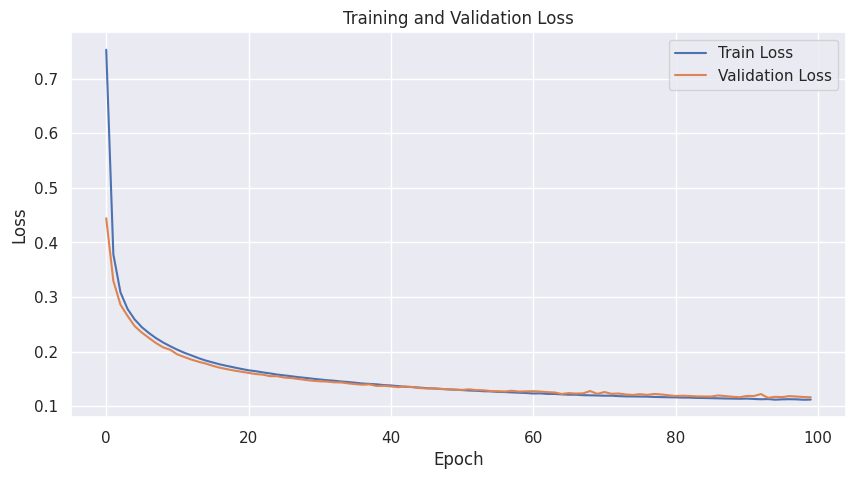

In [ ]:
# Number of epochs and neurons initialization
best_hidden_size = 64
num_epochs = 100

# Model initialization
model_relu = ShallowReLuNN(15, best_hidden_size, 4)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_relu.parameters(), lr=0.0005)

# Model training and validation
training_loop(model_relu, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

In [ ]:
class_names = ['Benign', 'PortScan', 'DoS Hulk', 'Brute Force']

# model_relu classification report generation with modified dataset
print("\n--- Classification Report per ShallowReLUNN con 64 neuroni (Test Set) ---")
generate_classification_report(model_relu, test_loader, class_names=class_names)


--- Classification Report per ShallowReLUNN con 64 neuroni (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.97      0.97      3378
    PortScan       0.31      0.25      0.27        57
    DoS Hulk       0.98      0.93      0.96       774
 Brute Force       0.81      0.94      0.87       285

    accuracy                           0.95      4494
   macro avg       0.77      0.77      0.77      4494
weighted avg       0.95      0.95      0.95      4494



### Enhancing performances using the weighted loss


In [ ]:
# Initial weights
classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
print(f"Classes: {classes}")
print(f"Computed Weights: {weights}")

weights_tensor = torch.tensor(weights, dtype=torch.float32)

Classes: [0 1 2 3]
Computed Weights: [ 0.3326014  19.70906433  1.45206807  3.93720794]


Epoch 20/100, Train Loss: 0.2570, Val Loss: 0.2413
Epoch 40/100, Train Loss: 0.2167, Val Loss: 0.2037
Epoch 60/100, Train Loss: 0.1990, Val Loss: 0.1867
Epoch 80/100, Train Loss: 0.1884, Val Loss: 0.1776
Epoch 100/100, Train Loss: 0.1797, Val Loss: 0.1729
The function took 46.2184 seconds to execute.


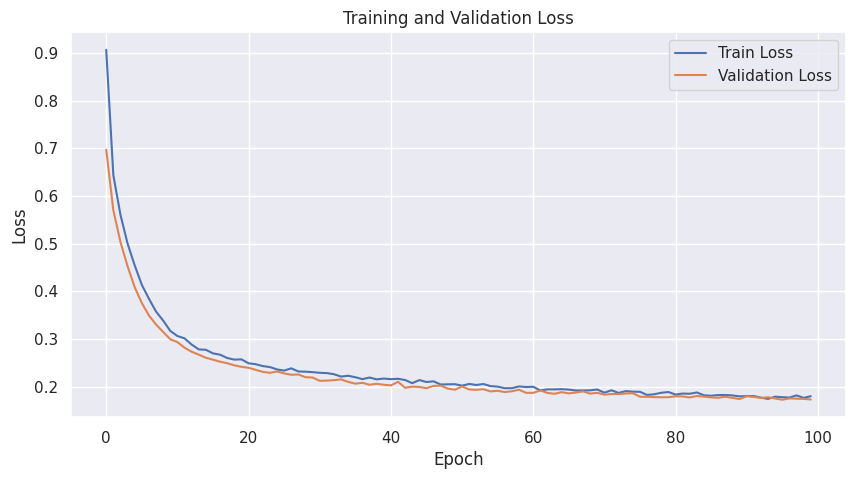

In [ ]:
# Model initialization
best_hidden_size = 128
model_relu = ShallowReLuNN(15, best_hidden_size, 4)
criterion = nn.CrossEntropyLoss(weight=weights_tensor)
optimizer_relu = optim.AdamW(model_relu.parameters(), lr=0.0005)

# Model training and validation
training_loop(model_relu, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

In [ ]:
# model_relu classification report with modified dataset (test)
print("--- Classification Report - ShallowReLUNN with weighted loss and 64 hidden neurons (Test Set) ---")
generate_classification_report(model_relu, test_loader, class_names=class_names)

--- Classification Report - ShallowReLUNN with weighted loss and 64 hidden neurons (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.99      0.91      0.95      3378
    PortScan       0.23      0.88      0.37        57
    DoS Hulk       0.89      0.96      0.92       774
 Brute Force       0.78      0.95      0.85       285

    accuracy                           0.92      4494
   macro avg       0.72      0.92      0.77      4494
weighted avg       0.95      0.92      0.93      4494



## Task 5: Deep Neural Network

### Selecting the best architecture

In [ ]:
# Deep Learing Feed Forward Neural Network - 3 layers
class DLFFNN_3layers(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, output_size):
        super(DLFFNN_3layers, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.fc4 = nn.Linear(l3_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

# Deep Learing Feed Forward Neural Network - 4 layers
class DLFFNN_4layers(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, l4_size, output_size):
        super(DLFFNN_4layers, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.fc4 = nn.Linear(l3_size, l4_size)
        self.fc5 = nn.Linear(l4_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        return x

# Deep Learing Feed Forward Neural Network - 5 layers
class DLFFNN_5layers(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, l4_size, l5_size, output_size):
        super(DLFFNN_5layers, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.fc4 = nn.Linear(l3_size, l4_size)
        self.fc5 = nn.Linear(l4_size, l5_size)
        self.fc6 = nn.Linear(l5_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        return x

In [ ]:
input_layer_size = 15
output_layer_size = 4

# 3 layers model initialization
model_3layers1 = DLFFNN_3layers(input_layer_size, 8, 16, 4, output_layer_size)
model_3layers2 = DLFFNN_3layers(input_layer_size, 32, 16, 8, output_layer_size)

# 4 layers model initialization
model_4layers1 = DLFFNN_4layers(input_layer_size, 4, 16, 2, 4, output_layer_size)
model_4layers2 = DLFFNN_4layers(input_layer_size, 32, 16, 8, 4, output_layer_size)

# 5 layers model initialization
model_5layers1 = DLFFNN_5layers(input_layer_size, 8, 4, 4, 8, 2, output_layer_size)
model_5layers2 = DLFFNN_5layers(input_layer_size, 32, 32, 32, 16, 16, output_layer_size)

num_epochs = 50

Epoch 20/50, Train Loss: 0.2306, Val Loss: 0.2251
Epoch 40/50, Train Loss: 0.1767, Val Loss: 0.1756
The function took 27.1083 seconds to execute.


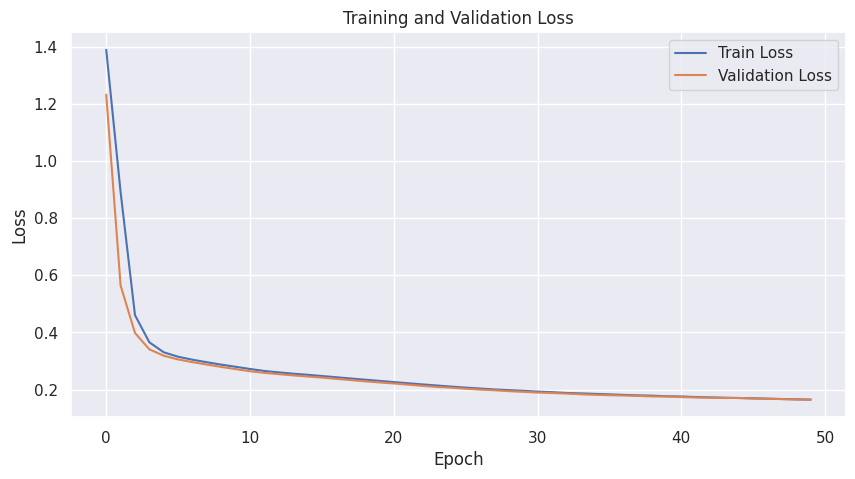


--- Classification Report 3_1 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.98      0.86      0.92       773
 Brute Force       0.79      0.91      0.85       286

    accuracy                           0.94      4494
   macro avg       0.68      0.69      0.68      4494
weighted avg       0.93      0.94      0.93      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 3 layers model training and validation
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_3layers1.parameters(), lr=0.0005)
training_loop(model_3layers1, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 3_1 (Validation Set) ---")
generate_classification_report(model_3layers1, val_loader, class_names=class_names)

Epoch 20/50, Train Loss: 0.1684, Val Loss: 0.1663
Epoch 40/50, Train Loss: 0.1263, Val Loss: 0.1299
The function took 27.2041 seconds to execute.


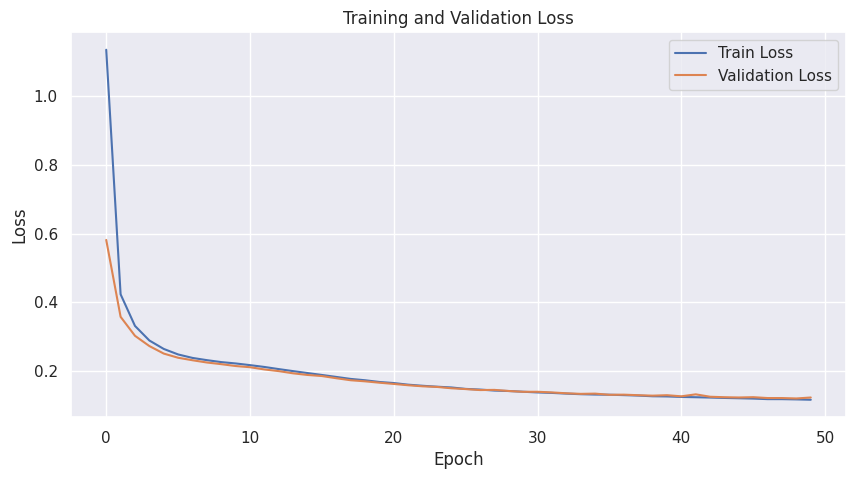


--- Classification Report 3_2 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.99      0.90      0.94       773
 Brute Force       0.93      0.96      0.94       286

    accuracy                           0.96      4494
   macro avg       0.72      0.71      0.71      4494
weighted avg       0.95      0.96      0.95      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 3 layers model training and validation
optimizer_relu = optim.AdamW(model_3layers2.parameters(), lr=0.0005)
training_loop(model_3layers2, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 3_2 (Validation Set) ---")
generate_classification_report(model_3layers2, val_loader, class_names=class_names)

Epoch 20/50, Train Loss: 0.2427, Val Loss: 0.2397
Epoch 40/50, Train Loss: 0.1893, Val Loss: 0.1930
The function took 30.2042 seconds to execute.


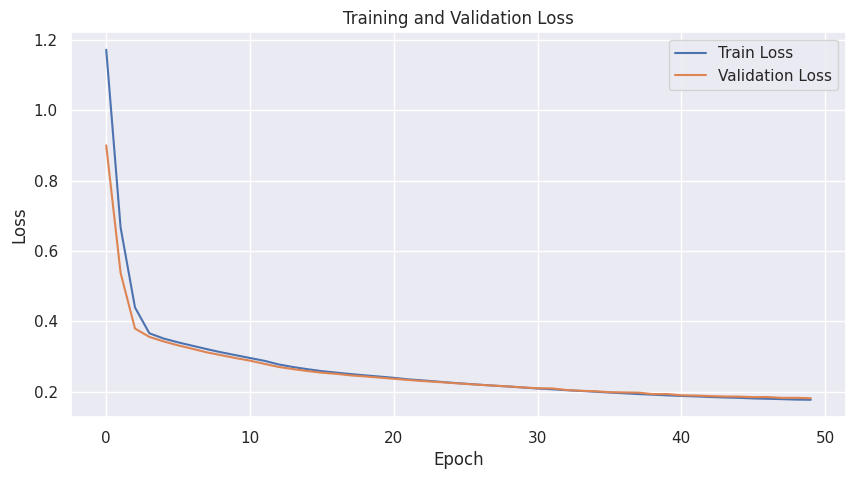


--- Classification Report 4_1 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       1.00      0.85      0.92       773
 Brute Force       0.74      0.93      0.83       286

    accuracy                           0.94      4494
   macro avg       0.67      0.69      0.68      4494
weighted avg       0.93      0.94      0.94      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 4 layers model training and validation
optimizer_relu = optim.AdamW(model_4layers1.parameters(), lr=0.0005)
training_loop(model_4layers1, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 4_1 (Validation Set) ---")
generate_classification_report(model_4layers1, val_loader, class_names=class_names)

Epoch 20/50, Train Loss: 0.1906, Val Loss: 0.1931
Epoch 40/50, Train Loss: 0.1303, Val Loss: 0.1380
The function took 29.5143 seconds to execute.


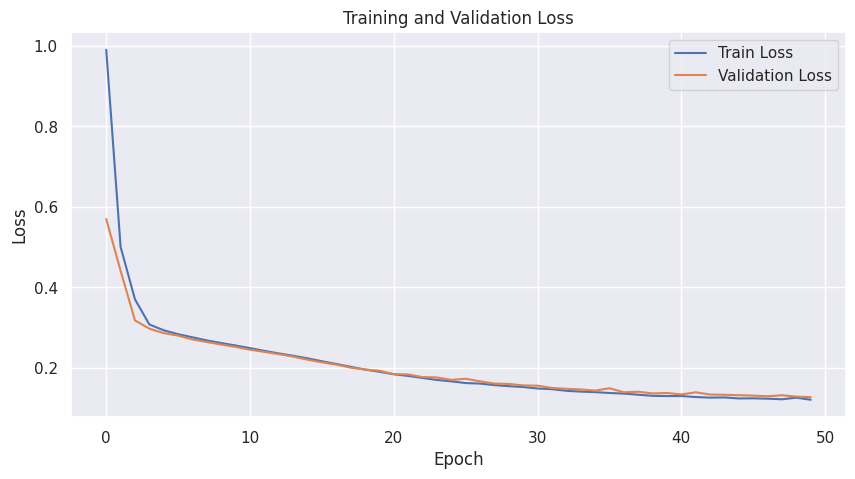


--- Classification Report 4_2 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.94      0.87      0.90       773
 Brute Force       0.92      0.97      0.94       286

    accuracy                           0.95      4494
   macro avg       0.70      0.71      0.70      4494
weighted avg       0.94      0.95      0.95      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 4 layers model training and validation
optimizer_relu = optim.AdamW(model_4layers2.parameters(), lr=0.0005)
training_loop(model_4layers2, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 4_2 (Validation Set) ---")
generate_classification_report(model_4layers2, val_loader, class_names=class_names)

Epoch 20/50, Train Loss: 0.3354, Val Loss: 0.3331
Epoch 40/50, Train Loss: 0.2728, Val Loss: 0.2764
The function took 31.8497 seconds to execute.


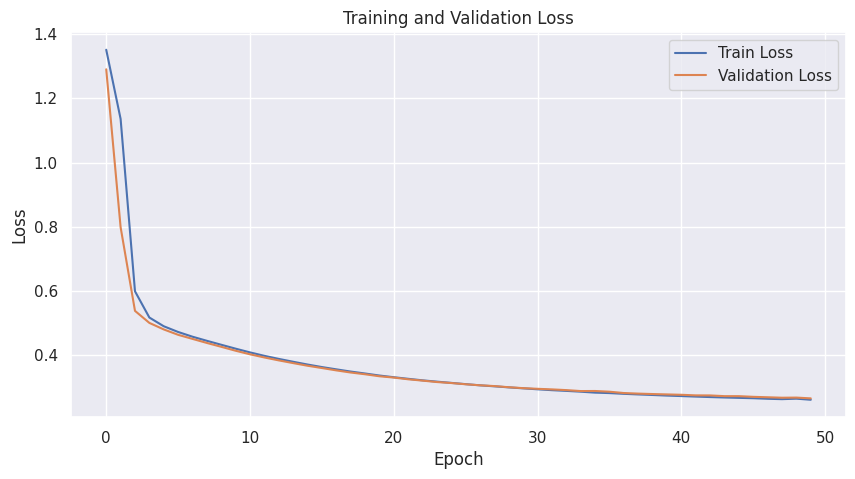


--- Classification Report 5_1 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.89      0.99      0.94      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.97      0.90      0.93       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.90      4494
   macro avg       0.46      0.47      0.47      4494
weighted avg       0.83      0.90      0.87      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 5 layers model training and validation
optimizer_relu = optim.AdamW(model_5layers1.parameters(), lr=0.0005)
training_loop(model_5layers1, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 5_1 (Validation Set) ---")
generate_classification_report(model_5layers1, val_loader, class_names=class_names)

Epoch 20/50, Train Loss: 0.1351, Val Loss: 0.1424
Epoch 40/50, Train Loss: 0.1118, Val Loss: 0.1271
The function took 31.8413 seconds to execute.


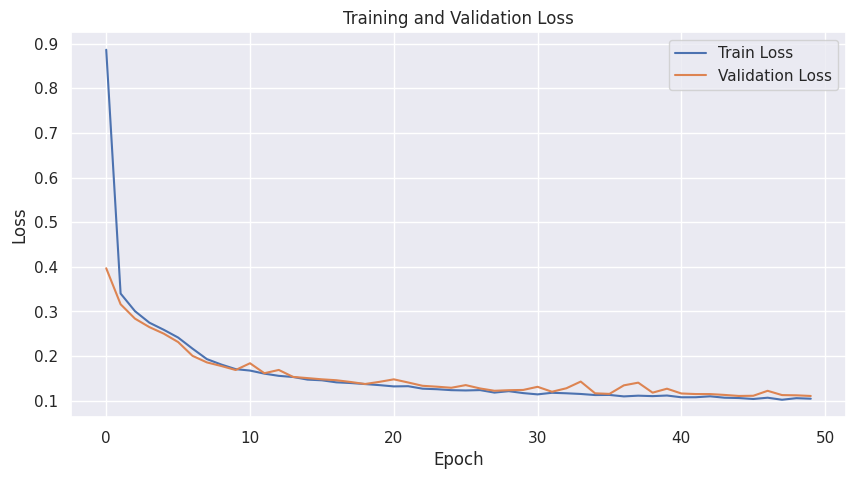


--- Classification Report 5_2 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98      3378
    PortScan       0.82      0.82      0.82        57
    DoS Hulk       0.97      0.91      0.94       773
 Brute Force       0.90      0.96      0.93       286

    accuracy                           0.97      4494
   macro avg       0.92      0.92      0.92      4494
weighted avg       0.97      0.97      0.97      4494



In [ ]:
# 5 layers model training and validation
optimizer_relu = optim.AdamW(model_5layers2.parameters(), lr=0.0005)
training_loop(model_5layers2, train_loader, val_loader, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# classification report
print("\n--- Classification Report 5_2 (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader, class_names=class_names)

In [ ]:
# Classifcation report of test set of best model 5_2
print("\n--- Classification Report 5_2 (Test Set) ---")
generate_classification_report(model_5layers2, test_loader, class_names=class_names)


--- Classification Report 5_2 (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.85      0.79      0.82        57
    DoS Hulk       0.97      0.94      0.95       774
 Brute Force       0.91      0.95      0.93       285

    accuracy                           0.97      4494
   macro avg       0.93      0.91      0.92      4494
weighted avg       0.97      0.97      0.97      4494



### The impact of Batch Size

In [ ]:
def dataloader_creation(batch_size):
  """
  This function create DataLoaders for the training, validation, and test datasets.

  Args:
      batch_size (int): Number of samples per batch to load.

  Returns:
      tuple: A tuple containing three DataLoaders:
          - train_loader (DataLoader): DataLoader for the training dataset (shuffled).
          - val_loader (DataLoader): DataLoader for the validation dataset (not shuffled).
          - test_loader (DataLoader): DataLoader for the test dataset (not shuffled).
  """
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
  return train_loader, val_loader, test_loader


# number of training epochs
num_epochs = 50
class_names = ['Benign', 'PortScan', 'DoS Hulk', 'Brute Force']

Epoch 20/50, Train Loss: 0.1169, Val Loss: 0.1396
Epoch 40/50, Train Loss: 0.1076, Val Loss: 0.0959
The function took 358.0044 seconds to execute.


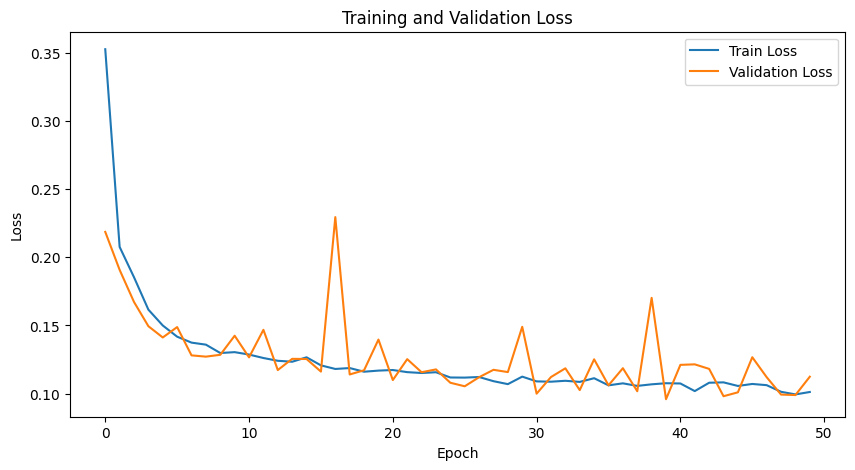


--- Classification Report 5_2 - Batch size of 4 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.98      3378
    PortScan       0.59      0.74      0.66        57
    DoS Hulk       0.99      0.91      0.95       773
 Brute Force       0.91      0.96      0.94       286

    accuracy                           0.97      4494
   macro avg       0.87      0.90      0.88      4494
weighted avg       0.97      0.97      0.97      4494



In [ ]:
# batch size = 4
model_5layers2 = DLFFNN_5layers(15, 32, 32, 32, 16, 16, 4)
train_loader_bs4, val_loader_bs4, test_loader_bs4 = dataloader_creation(4)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_5layers2.parameters(), lr=0.0005)

# Model training and validation loss
training_loop(model_5layers2, train_loader_bs4, val_loader_bs4, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# Classification report
print("\n--- Classification Report 5_2 - Batch size of 4 (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader_bs4, class_names=class_names)


Epoch 20/50, Train Loss: 0.1425, Val Loss: 0.1461
Epoch 40/50, Train Loss: 0.1099, Val Loss: 0.1095
The function took 33.4242 seconds to execute.


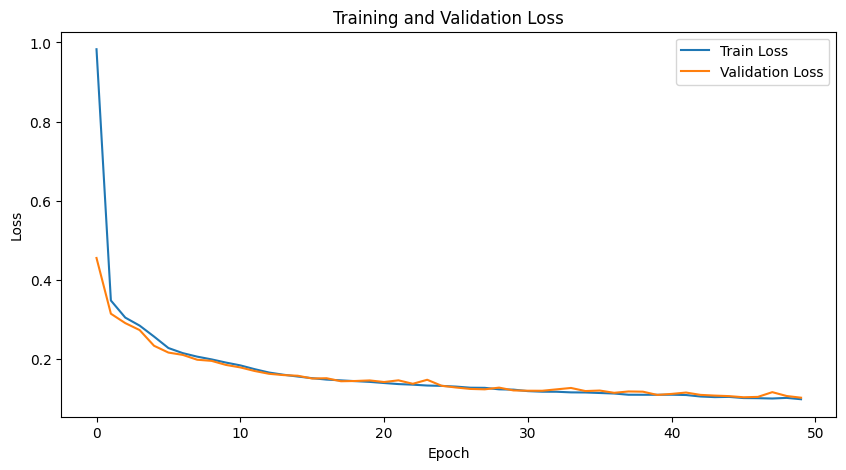


--- Classification Report 5_2 - Batch size of 64 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.79      0.79      0.79        57
    DoS Hulk       0.97      0.92      0.94       773
 Brute Force       0.91      0.98      0.94       286

    accuracy                           0.97      4494
   macro avg       0.91      0.92      0.91      4494
weighted avg       0.97      0.97      0.97      4494



In [ ]:
## batch size = 64
model_5layers2 = DLFFNN_5layers(15, 32, 32, 32, 16, 16, 4)
train_loader_bs64, val_loader_bs64, test_loader_bs64 = dataloader_creation(64)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_5layers2.parameters(), lr=0.0005)

# Model training and validation loss
training_loop(model_5layers2, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# Classification report
print("\n--- Classification Report 5_2 - Batch size of 64 (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader_bs64, class_names=class_names)

Epoch 20/50, Train Loss: 0.2017, Val Loss: 0.1963
Epoch 40/50, Train Loss: 0.1250, Val Loss: 0.1312
The function took 15.7225 seconds to execute.


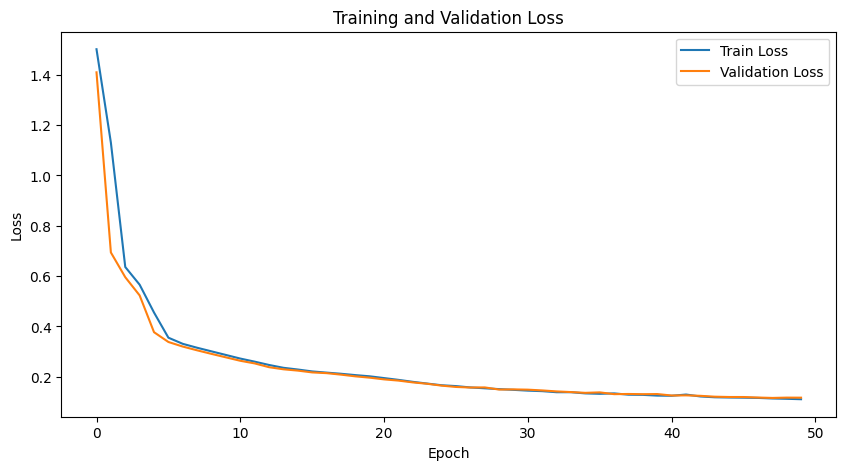


--- Classification Report 5_2 - Batch size of 256 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.99      0.91      0.95       773
 Brute Force       0.92      0.97      0.94       286

    accuracy                           0.96      4494
   macro avg       0.72      0.72      0.72      4494
weighted avg       0.95      0.96      0.96      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
## batch size = 256
model_5layers2 = DLFFNN_5layers(15, 32, 32, 32, 16, 16, 4)
train_loader_bs256, val_loader_bs256, test_loader_bs256 = dataloader_creation(256)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_5layers2.parameters(), lr=0.0005)

# Model training and validation loss
training_loop(model_5layers2, train_loader_bs256, val_loader_bs256, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

# Classification report
print("\n--- Classification Report 5_2 - Batch size of 256 (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader_bs256, class_names=class_names)

Epoch 20/50, Train Loss: 0.3006, Val Loss: 0.2966
Epoch 40/50, Train Loss: 0.2393, Val Loss: 0.2377
The function took 13.2754 seconds to execute.


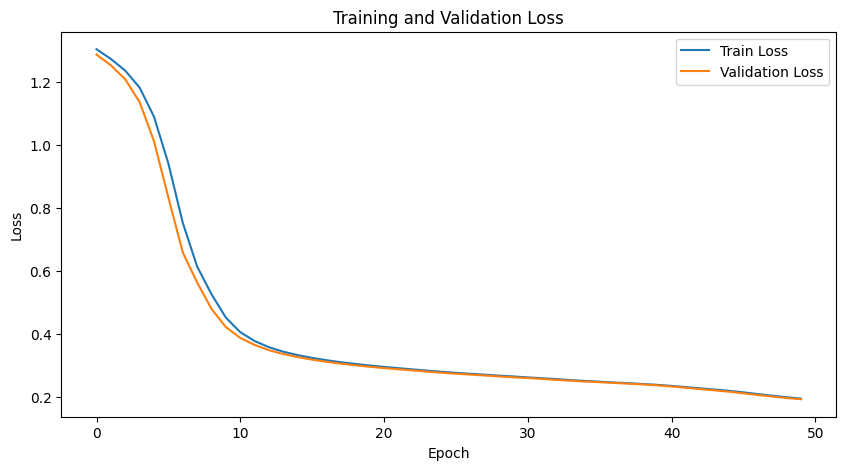


--- Classification Report 5_2 - Batch size of 1024 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.98      0.86      0.92       773
 Brute Force       0.79      0.91      0.85       286

    accuracy                           0.94      4494
   macro avg       0.68      0.69      0.68      4494
weighted avg       0.93      0.94      0.93      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
## batch size = 1024
model_5layers2 = DLFFNN_5layers(15, 32, 32, 32, 16, 16, 4)
train_loader_bs1024, val_loader_bs1024, test_loader_bs1024 = dataloader_creation(1024)
criterion = nn.CrossEntropyLoss()
optimizer_relu = optim.AdamW(model_5layers2.parameters(), lr=0.0005)

# Model training and valdiation loss
training_loop(model_5layers2, train_loader_bs1024, val_loader_bs1024, train_dataset, val_dataset,optimizer_relu, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report 5_2 - Batch size of 1024 (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader_bs1024, class_names=class_names)

### The impact of the Optimizer

In [ ]:
learning_rate = 0.0005
class_names = ['Benign', 'PortScan', 'DoS Hulk', 'Brute Force']

Epoch 20/50, Train Loss: 0.8833, Val Loss: 0.8793
Epoch 40/50, Train Loss: 0.7997, Val Loss: 0.7988
The function took 21.9303 seconds to execute.


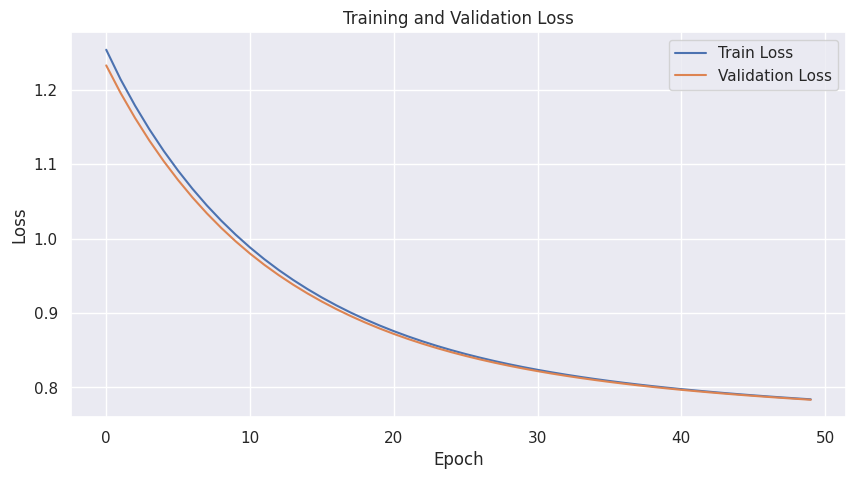


--- Classification Report - ShallowReLUNN with SGD optimizer (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.75      1.00      0.86      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.00      0.00      0.00       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.57      0.75      0.65      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Stochastic Gradient Descent

# Reinitialize the best deep learning model (model_5layers2)
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16
model_5layers2 = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

# Define criterion and optimizer (SGD)
criterion = nn.CrossEntropyLoss()
optimizer_sgd = optim.SGD(model_5layers2.parameters(), lr=learning_rate)

# Train the model with SGD
num_epochs = 50  # Using 50 epochs as in previous runs
training_loop(model_5layers2, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset, optimizer_sgd, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - ShallowReLUNN with SGD optimizer (Validation Set) ---")
generate_classification_report(model_5layers2, val_loader_bs64, class_names=class_names)

Epoch 20/50, Train Loss: 0.8685, Val Loss: 0.8636
Epoch 40/50, Train Loss: 0.7802, Val Loss: 0.7795
The function took 25.3197 seconds to execute.


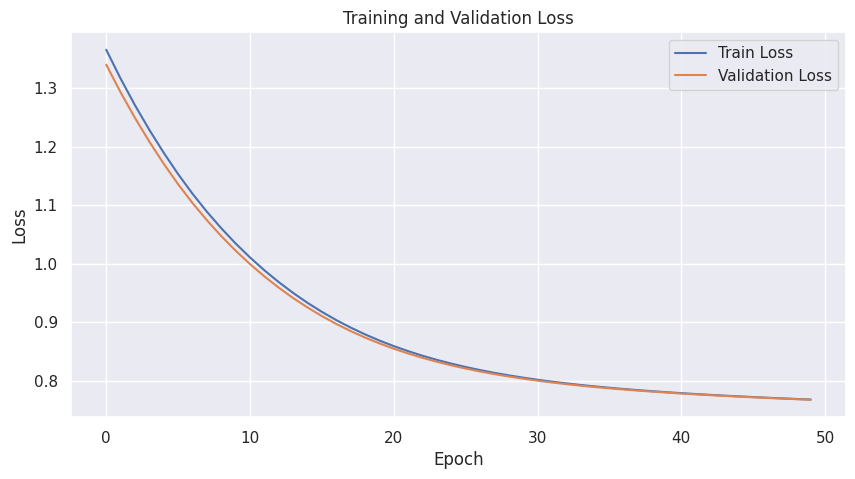


--- Classification Report - ShallowReLUNN with SGD_0.1 optimizer (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.75      1.00      0.86      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.00      0.00      0.00       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.57      0.75      0.65      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Stochastic Gradient Descent with 0.1 momentum

# Reinitialize the best deep learning model (model_5layers2)
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16
model_5layers2_momentum_01 = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

# Define criterion and optimizer (SGD with Momentum 0.1)
criterion = nn.CrossEntropyLoss()
optimizer_sgd_momentum_01 = optim.SGD(model_5layers2_momentum_01.parameters(), lr=learning_rate, momentum=0.1)

# Train the model with SGD with Momentum 0.1
num_epochs = 50  # Using 50 epochs as in previous runs
training_loop(model_5layers2_momentum_01, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset, optimizer_sgd_momentum_01, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - ShallowReLUNN with SGD_0.1 optimizer (Validation Set) ---")
generate_classification_report(model_5layers2_momentum_01, val_loader_bs64, class_names=class_names)

Epoch 20/50, Train Loss: 0.7870, Val Loss: 0.7852
Epoch 40/50, Train Loss: 0.7504, Val Loss: 0.7497
The function took 25.0541 seconds to execute.


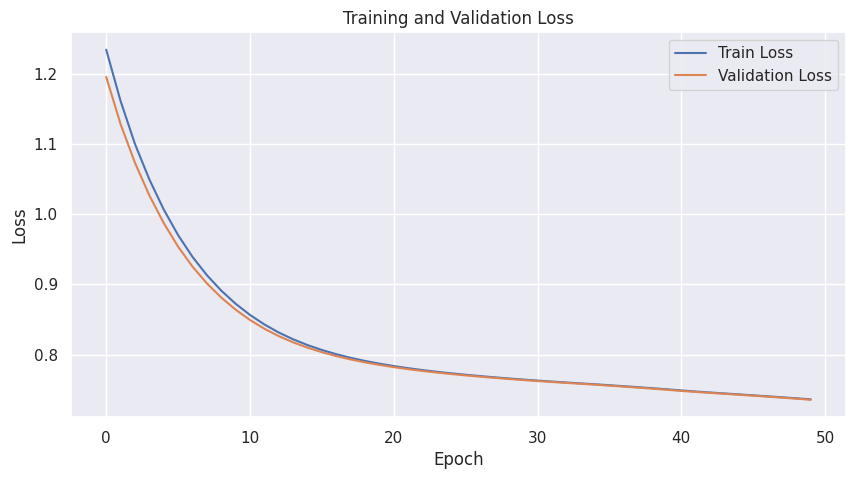


--- Classification Report - ShallowReLUNN with SGD_0.5 optimizer (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.75      1.00      0.86      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.00      0.00      0.00       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.75      4494
   macro avg       0.19      0.25      0.21      4494
weighted avg       0.57      0.75      0.65      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Stochastic Gradient Descent with 0.5 momentum

# Reinitialize the best deep learning model (model_5layers2)
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16
model_5layers2_momentum_05 = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

# Define criterion and optimizer (SGD with Momentum 0.5)
criterion = nn.CrossEntropyLoss()
optimizer_sgd_momentum_05 = optim.SGD(model_5layers2_momentum_05.parameters(), lr=learning_rate, momentum=0.5)

# Train the model with SGD with Momentum 0.5
num_epochs = 50  # Using 50 epochs as in previous runs
training_loop(model_5layers2_momentum_05, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset, optimizer_sgd_momentum_05, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - ShallowReLUNN with SGD_0.5 optimizer (Validation Set) ---")
generate_classification_report(model_5layers2_momentum_05, val_loader_bs64, class_names=class_names)

Epoch 20/50, Train Loss: 0.5290, Val Loss: 0.5165
Epoch 40/50, Train Loss: 0.3032, Val Loss: 0.3011
The function took 24.8835 seconds to execute.


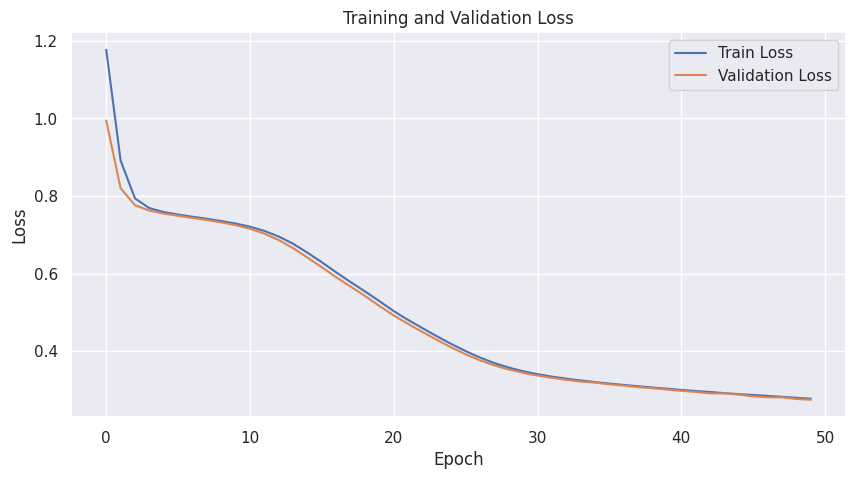


--- Classification Report - ShallowReLUNN with SGD_0.9 optimizer (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.88      1.00      0.94      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.99      0.85      0.92       773
 Brute Force       0.00      0.00      0.00       286

    accuracy                           0.90      4494
   macro avg       0.47      0.46      0.46      4494
weighted avg       0.83      0.90      0.86      4494



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Stochastic Gradient Descent with 0.9 momentum

# Reinitialize the best deep learning model (model_5layers2)
best_hidden_size = 32 # Based on previous validation results, the best architecture for 5 layers seemed to be (32, 32, 32, 16, 16)
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16
model_5layers2_momentum_09 = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

# Define criterion and optimizer (SGD with Momentum 0.9)
criterion = nn.CrossEntropyLoss()
optimizer_sgd_momentum_09 = optim.SGD(model_5layers2_momentum_09.parameters(), lr=learning_rate, momentum=0.9)

# Train the model with SGD with Momentum 0.9
num_epochs = 50  # Using 50 epochs as in previous runs
training_loop(model_5layers2_momentum_09, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset, optimizer_sgd_momentum_09, criterion, num_epochs, min_delta, patience)


print("\n--- Classification Report - ShallowReLUNN with SGD_0.9 optimizer (Validation Set) ---")
generate_classification_report(model_5layers2_momentum_09, val_loader_bs64, class_names=class_names)

Epoch 20/50, Train Loss: 0.1235, Val Loss: 0.1202
Epoch 40/50, Train Loss: 0.1032, Val Loss: 0.1031
The function took 32.3637 seconds to execute.


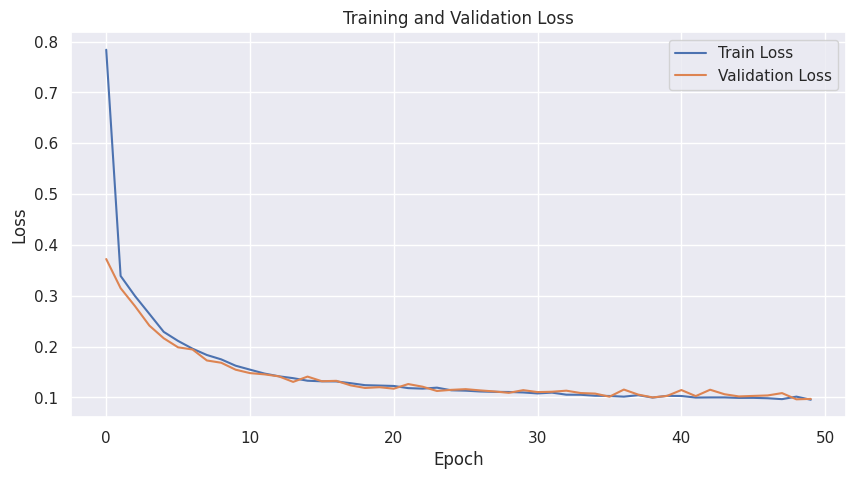


--- Classification Report - ShallowReLUNN with AdamW optimizer (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      3378
    PortScan       0.44      0.28      0.34        57
    DoS Hulk       0.98      0.91      0.95       773
 Brute Force       0.94      0.96      0.95       286

    accuracy                           0.96      4494
   macro avg       0.83      0.78      0.80      4494
weighted avg       0.96      0.96      0.96      4494



In [ ]:
# AdamW

# Reinitialize the best deep learning model (model_5layers2)
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16
model_5layers2_adamw = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

# Define criterion and optimizer (AdamW)
criterion = nn.CrossEntropyLoss()
optimizer_adamw = optim.AdamW(model_5layers2_adamw.parameters(), lr=learning_rate)

# Train the model with AdamW
num_epochs = 50  # Using 50 epochs as in previous runs
training_loop(model_5layers2_adamw, train_loader_bs64, val_loader_bs64, train_dataset, val_dataset, optimizer_adamw, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - ShallowReLUNN with AdamW optimizer (Validation Set) ---")
generate_classification_report(model_5layers2_adamw, val_loader_bs64, class_names=class_names)

The best optimizer seems to be the AdamW. Let's focus on other hyperparameters like learning rate and number of epochs.

To do that, we designed an hyperparameter grid containing the possibile hyperparameter values we choose to test. Then after iterating through the defined learning rates and epochs, we train the best model architecture with AdamW, and store validation performance.

In [ ]:
learning_rates = [0.001, 0.0005, 0.0001]
num_epochs_list = [50, 100]


--- Training with Learning Rate: 0.001, Epochs: 50 ---
Epoch 20/50, Train Loss: 0.1068, Val Loss: 0.1112
Epoch 40/50, Train Loss: 0.0820, Val Loss: 0.0901
The function took 32.4894 seconds to execute.


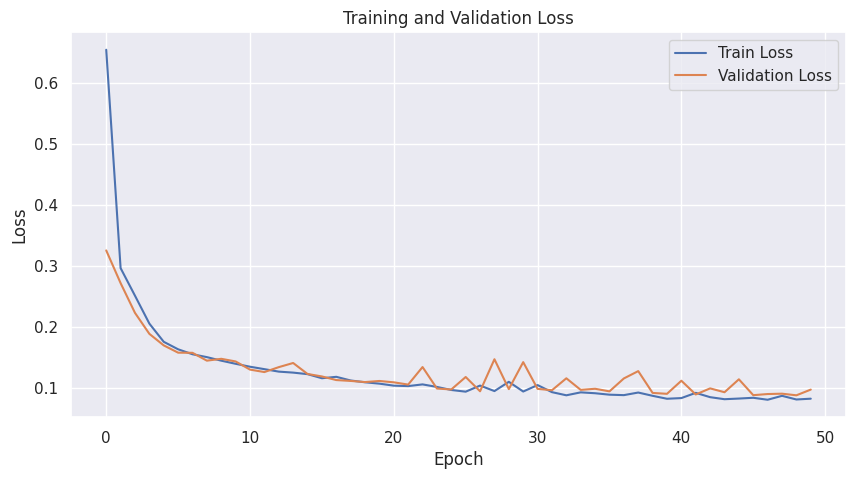


--- Classification Report for LR: 0.001, Epochs: 50 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.87      0.81      0.84        57
    DoS Hulk       0.97      0.93      0.95       773
 Brute Force       0.93      0.96      0.94       286

    accuracy                           0.97      4494
   macro avg       0.94      0.92      0.93      4494
weighted avg       0.97      0.97      0.97      4494



--- Training with Learning Rate: 0.001, Epochs: 100 ---
Epoch 20/100, Train Loss: 0.1028, Val Loss: 0.1078
Epoch 40/100, Train Loss: 0.0874, Val Loss: 0.1138
Epoch 60/100, Train Loss: 0.0891, Val Loss: 0.1003
Epoch 80/100, Train Loss: 0.0783, Val Loss: 0.0862
Epoch 100/100, Train Loss: 0.0708, Val Loss: 0.0883
The function took 66.2149 seconds to execute.


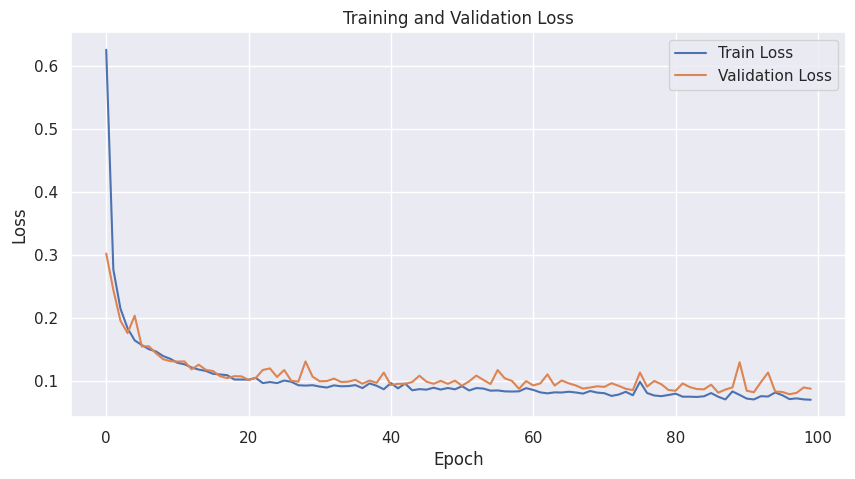


--- Classification Report for LR: 0.001, Epochs: 100 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.94      0.82      0.88        57
    DoS Hulk       0.98      0.93      0.95       773
 Brute Force       0.93      0.97      0.95       286

    accuracy                           0.97      4494
   macro avg       0.96      0.93      0.94      4494
weighted avg       0.97      0.97      0.97      4494



--- Training with Learning Rate: 0.0005, Epochs: 50 ---
Epoch 20/50, Train Loss: 0.1137, Val Loss: 0.1204
Epoch 40/50, Train Loss: 0.0938, Val Loss: 0.1042
The function took 33.4937 seconds to execute.


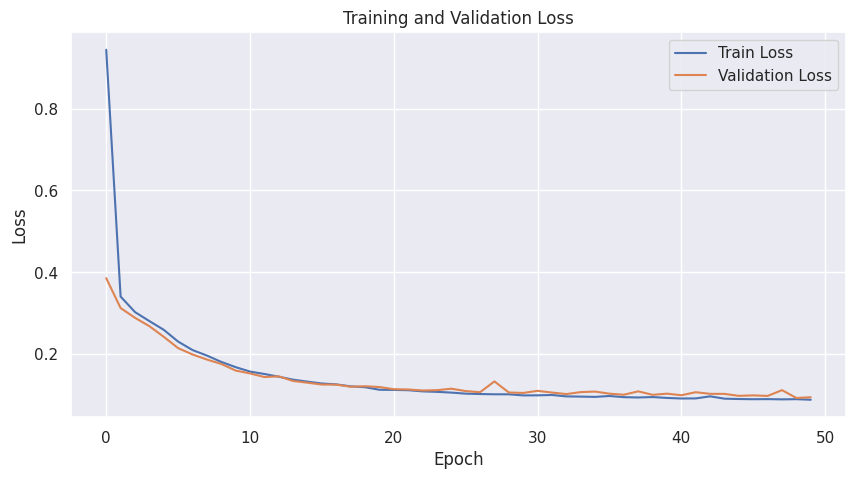


--- Classification Report for LR: 0.0005, Epochs: 50 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      3378
    PortScan       0.82      0.63      0.71        57
    DoS Hulk       0.97      0.91      0.94       773
 Brute Force       0.92      0.96      0.94       286

    accuracy                           0.97      4494
   macro avg       0.92      0.87      0.89      4494
weighted avg       0.97      0.97      0.97      4494



--- Training with Learning Rate: 0.0005, Epochs: 100 ---
Epoch 20/100, Train Loss: 0.1238, Val Loss: 0.1235
Epoch 40/100, Train Loss: 0.0993, Val Loss: 0.1157
Epoch 60/100, Train Loss: 0.0913, Val Loss: 0.0934
Epoch 80/100, Train Loss: 0.0899, Val Loss: 0.0929
Epoch 100/100, Train Loss: 0.0850, Val Loss: 0.0864
The function took 69.5824 seconds to execute.


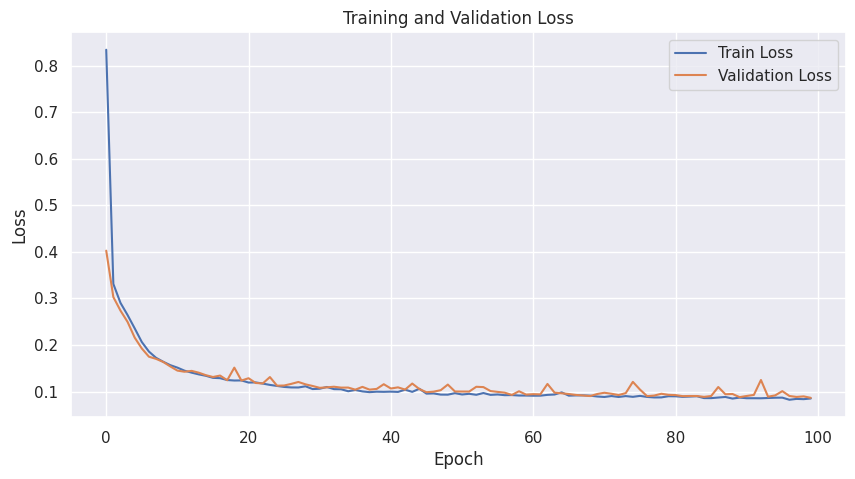


--- Classification Report for LR: 0.0005, Epochs: 100 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.59      0.68      0.63        57
    DoS Hulk       0.97      0.92      0.94       773
 Brute Force       0.94      0.97      0.95       286

    accuracy                           0.97      4494
   macro avg       0.87      0.89      0.88      4494
weighted avg       0.97      0.97      0.97      4494



--- Training with Learning Rate: 0.0001, Epochs: 50 ---
Epoch 20/50, Train Loss: 0.2359, Val Loss: 0.2311
Epoch 40/50, Train Loss: 0.1741, Val Loss: 0.1725
The function took 37.8161 seconds to execute.


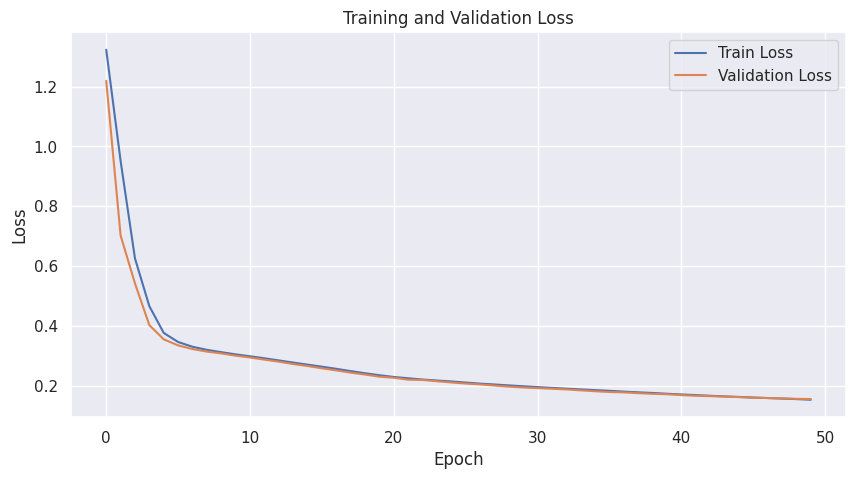


--- Classification Report for LR: 0.0001, Epochs: 50 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.98      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.98      0.86      0.92       773
 Brute Force       0.80      0.91      0.85       286

    accuracy                           0.94      4494
   macro avg       0.68      0.69      0.68      4494
weighted avg       0.93      0.94      0.94      4494



--- Training with Learning Rate: 0.0001, Epochs: 100 ---


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 20/100, Train Loss: 0.2663, Val Loss: 0.2624
Epoch 40/100, Train Loss: 0.1776, Val Loss: 0.1747
Epoch 60/100, Train Loss: 0.1411, Val Loss: 0.1421
Epoch 80/100, Train Loss: 0.1240, Val Loss: 0.1279
Epoch 100/100, Train Loss: 0.1134, Val Loss: 0.1159
The function took 71.9670 seconds to execute.


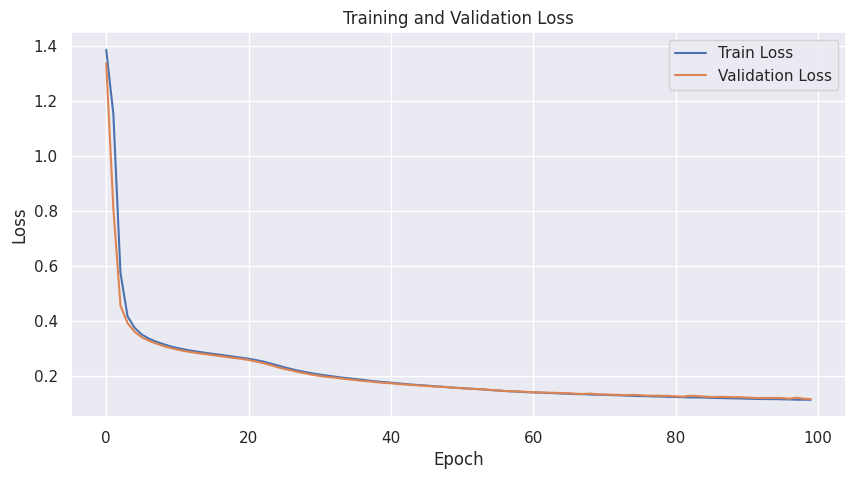


--- Classification Report for LR: 0.0001, Epochs: 100 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97      3378
    PortScan       0.46      0.11      0.17        57
    DoS Hulk       0.98      0.91      0.94       773
 Brute Force       0.90      0.96      0.93       286

    accuracy                           0.96      4494
   macro avg       0.83      0.74      0.75      4494
weighted avg       0.95      0.96      0.96      4494



--- Validation Performance Summary ---
lr_0.001_epochs_50: Accuracy = 0.9700, Macro Avg F1-score = 0.9300
lr_0.001_epochs_100: Accuracy = 0.9700, Macro Avg F1-score = 0.9400
lr_0.0005_epochs_50: Accuracy = 0.9700, Macro Avg F1-score = 0.8900
lr_0.0005_epochs_100: Accuracy = 0.9700, Macro Avg F1-score = 0.8800
lr_0.0001_epochs_50: Accuracy = 0.9400, Macro Avg F1-score = 0.6800
lr_0.0001_epochs_100: Accuracy = 0.9600, Macro Avg F1-score = 0.7500


In [ ]:
validation_performance = {}

l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16

for lr in learning_rates:
    for epochs in num_epochs_list:
        print(f"\n--- Training with Learning Rate: {lr}, Epochs: {epochs} ---")

        # Reinitialize the best deep learning model architecture
        model = DLFFNN_5layers(15, l1_size, l2_size, l3_size, l4_size, l5_size, 4)

        # Define criterion and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.AdamW(model.parameters(), lr=lr)

        # Train the model
        training_loop(model, train_loader, val_loader, train_dataset, val_dataset, optimizer, criterion, epochs, min_delta, patience)

        # Evaluate on validation set and store performance
        print(f"\n--- Classification Report for LR: {lr}, Epochs: {epochs} (Validation Set) ---")
        # Redirect stdout to capture the report
        import sys
        from io import StringIO

        old_stdout = sys.stdout
        sys.stdout = StringIO()

        generate_classification_report(model, val_loader, class_names=class_names)

        report = sys.stdout.getvalue()
        sys.stdout = old_stdout

        print(report)

        # Parse the classification report to extract metrics
        report_lines = report.strip().split('\n')
        metrics = {}
        for line in report_lines[2:]: # Skip header lines
            if line:
                parts = line.split()
                if len(parts) > 0 and parts[0] in class_names + ['accuracy', 'macro', 'weighted']:
                     if parts[0] == 'accuracy':
                         metrics['accuracy'] = float(parts[1])
                     elif parts[0] in ['macro', 'weighted']:
                         metrics[f'{parts[0]}_avg_precision'] = float(parts[2])
                         metrics[f'{parts[0]}_avg_recall'] = float(parts[3])
                         metrics[f'{parts[0]}_avg_f1-score'] = float(parts[4])
                     else: # Individual class metrics
                         class_name = parts[0]
                         metrics[f'{class_name}_precision'] = float(parts[1])
                         metrics[f'{class_name}_recall'] = float(parts[2])
                         metrics[f'{class_name}_f1-score'] = float(parts[3])
                         metrics[f'{class_name}_support'] = int(parts[4])


        validation_performance[f'lr_{lr}_epochs_{epochs}'] = metrics

print("\n--- Validation Performance Summary ---")
for key, metrics in validation_performance.items():
    print(f"{key}: Accuracy = {metrics.get('accuracy', 'N/A'):.4f}, Macro Avg F1-score = {metrics.get('macro_avg_f1-score', 'N/A'):.4f}")


### The impact of lr and epochs

Best Hyperparameters based on Macro Avg F1-score: {'lr': 0.001, 'epochs': 100}

--- Training the Best Model with LR: 0.001, Epochs: 100 ---
Epoch 20/100, Train Loss: 0.1102, Val Loss: 0.1088
Epoch 40/100, Train Loss: 0.0958, Val Loss: 0.0989
Epoch 60/100, Train Loss: 0.0824, Val Loss: 0.0978
Epoch 80/100, Train Loss: 0.0758, Val Loss: 0.0967
Epoch 100/100, Train Loss: 0.0807, Val Loss: 0.1140
The function took 71.2039 seconds to execute.


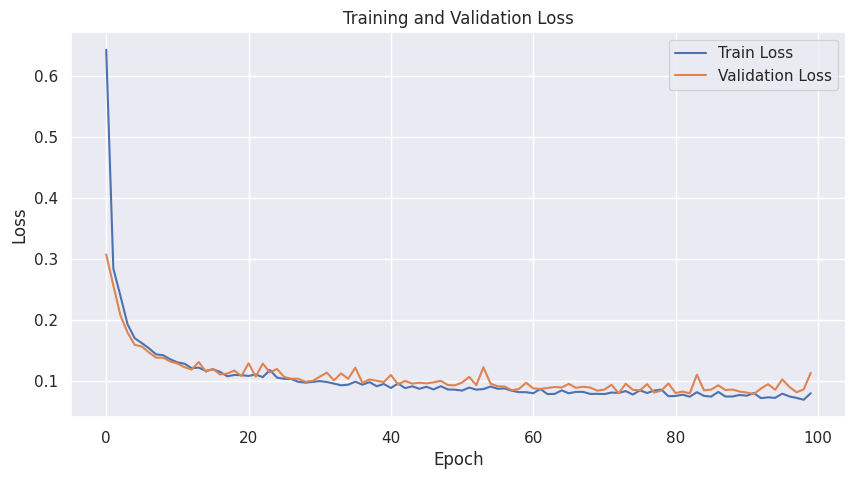

In [ ]:
# Analyze validation performance to find the best hyperparameters
best_macro_f1 = -1
best_hyperparameters = None

for key, metrics in validation_performance.items():
    macro_f1 = metrics.get('macro_avg_f1-score', -1)
    if macro_f1 > best_macro_f1:
        best_macro_f1 = macro_f1
        # Extract lr and epochs from the key string
        parts = key.split('_')
        lr = float(parts[1])
        epochs = int(parts[3])
        best_hyperparameters = {'lr': lr, 'epochs': epochs}

print(f"Best Hyperparameters based on Macro Avg F1-score: {best_hyperparameters}")

# Reinitialize and train the model with the best hyperparameters
best_lr = best_hyperparameters['lr']
best_epochs = best_hyperparameters['epochs']

# Reinitialize the best deep learning model architecture
input_size = X_train.shape[1]
l1_size, l2_size, l3_size, l4_size, l5_size = 32, 32, 32, 16, 16 # Using the previously identified best architecture
output_size = 4

best_model = DLFFNN_5layers(input_size, l1_size, l2_size, l3_size, l4_size, l5_size, output_size)

# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(best_model.parameters(), lr=best_lr)

# Train the best model
print(f"\n--- Training the Best Model with LR: {best_lr}, Epochs: {best_epochs} ---")
training_loop(best_model, train_loader, val_loader, train_dataset, val_dataset, optimizer, criterion, best_epochs, min_delta, patience)

# The best_model instance is now trained and ready for evaluation on the test set in the next step.

In [ ]:
print("\n--- Classification Report for Best Model (Test Set) ---")
generate_classification_report(best_model, test_loader, class_names=class_names)


--- Classification Report for Best Model (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.94      0.81      0.87        57
    DoS Hulk       0.95      0.95      0.95       774
 Brute Force       0.92      0.94      0.93       285

    accuracy                           0.97      4494
   macro avg       0.95      0.92      0.93      4494
weighted avg       0.97      0.97      0.97      4494



## Task 6: Overfitting and Regularization

In [ ]:
class_names = ['Benign', 'PortScan', 'DoS Hulk', 'Brute Force']

Epoch 20/50, Train Loss: 0.1161, Val Loss: 0.1215
Epoch 40/50, Train Loss: 0.0928, Val Loss: 0.0949
The function took 26.0164 seconds to execute.


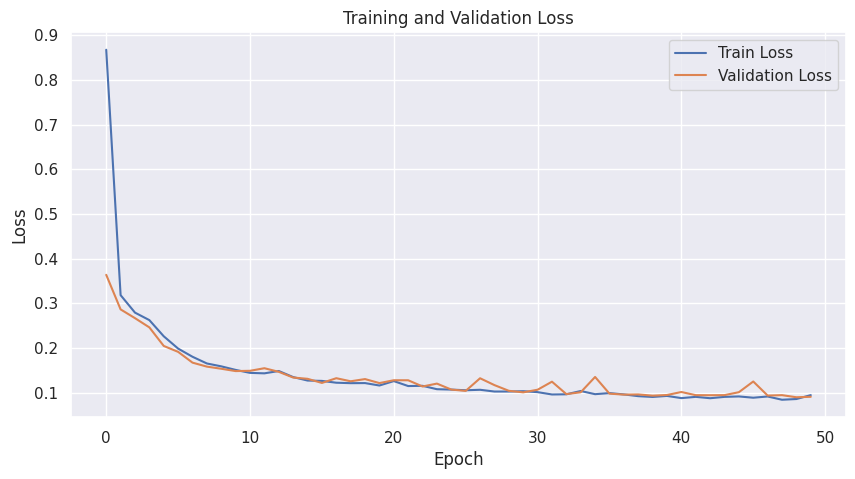


--- Classification Report - DLFFNN_6layers (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      3378
    PortScan       0.88      0.79      0.83        57
    DoS Hulk       0.97      0.91      0.94       773
 Brute Force       0.92      0.97      0.94       286

    accuracy                           0.97      4494
   macro avg       0.94      0.91      0.92      4494
weighted avg       0.97      0.97      0.97      4494



In [ ]:
# Deep Learning Feed Forward Neural Network - 6 layers
class DLFFNN_6layers(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size):
        super(DLFFNN_6layers, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.fc4 = nn.Linear(l3_size, l4_size)
        self.fc5 = nn.Linear(l4_size, l5_size)
        self.fc6 = nn.Linear(l5_size, l6_size)
        self.fc7 = nn.Linear(l6_size, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.fc7(x)
        return x

# Model Initialization
input_size = X_train.shape[1]
l1_size, l2_size, l3_size, l4_size, l5_size, l6_size = 256, 128, 64, 32, 16, 16
output_size = 4

model_6layers = DLFFNN_6layers(input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_6layers.parameters(), lr=0.0005)

# DataLoader with Batch Size 128
train_loader_128 = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader_128 = DataLoader(val_dataset, batch_size=128, shuffle=False)

# Training Loop
num_epochs = 50
min_delta = 0.00001
patience = 20

training_loop(model_6layers, train_loader_128, val_loader_128, train_dataset, val_dataset, optimizer, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - DLFFNN_6layers (Validation Set) ---")
generate_classification_report(model_6layers, val_loader_128, class_names=class_names)

### Impact of Dropout



Epoch 20/50, Train Loss: 0.3314, Val Loss: 0.2840
Epoch 40/50, Train Loss: 0.2726, Val Loss: 0.2229
The function took 26.6786 seconds to execute.


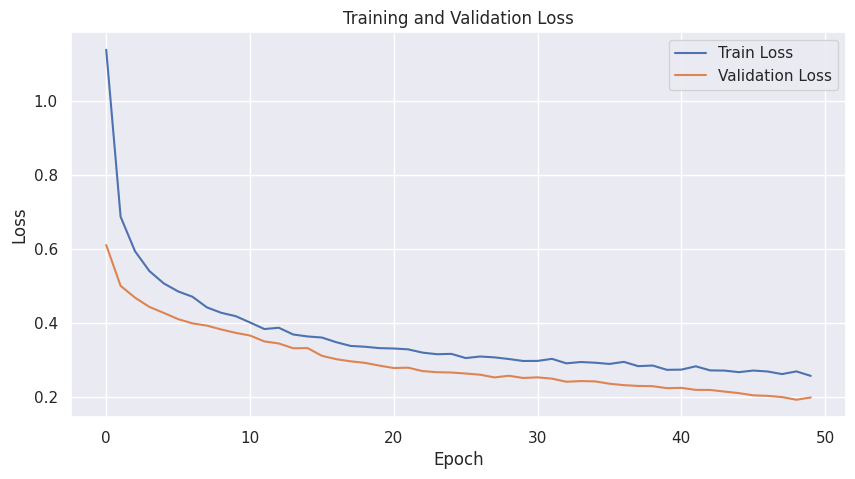


--- Classification Report - DLFFNN_6layers with Dropout (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.99      0.86      0.92       773
 Brute Force       0.75      0.97      0.85       286

    accuracy                           0.94      4494
   macro avg       0.67      0.70      0.68      4494
weighted avg       0.93      0.94      0.94      4494


--- Classification Report - DLFFNN_6layers with Dropout (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.95      0.97      0.96      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.99      0.87      0.93       774
 Brute Force       0.75      0.95      0.84       285

    accuracy                           0.94      4494
   macro avg       0.67      0.70      0.68      4494
weighted avg       0.93      0.94  

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:

# Deep Learning Feed Forward Neural Network - 6 layers with Dropout
class DLFFNN_6layers_Dropout(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size, dropout_prob=0.5):
        super(DLFFNN_6layers_Dropout, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.fc4 = nn.Linear(l3_size, l4_size)
        self.fc5 = nn.Linear(l4_size, l5_size)
        self.fc6 = nn.Linear(l5_size, l6_size)
        self.fc7 = nn.Linear(l6_size, output_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_prob)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc5(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc6(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc7(x)
        return x

# Model Initialization
input_size = X_train.shape[1]
l1_size, l2_size, l3_size, l4_size, l5_size, l6_size = 256, 128, 64, 32, 16, 16
output_size = 4

model_6layers_dropout = DLFFNN_6layers_Dropout(input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_6layers_dropout.parameters(), lr=0.0005)

# Tensordataset creation
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader with Batch Size 128
train_loader_128 = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader_128 = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader_128 = DataLoader(test_dataset, batch_size=128, shuffle=False) # Create a test loader with batch size 128

# Training Loop
num_epochs = 50
min_delta = 0.00001
patience = 20

training_loop(model_6layers_dropout, train_loader_128, val_loader_128, train_dataset, val_dataset, optimizer, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - DLFFNN_6layers with Dropout (Validation Set) ---")
generate_classification_report(model_6layers_dropout, val_loader_128, class_names=class_names)

print("\n--- Classification Report - DLFFNN_6layers with Dropout (Test Set) ---")
generate_classification_report(model_6layers_dropout, test_loader_128, class_names=class_names)

### Impact of Batch Normalization


Epoch 20/50, Train Loss: 0.1088, Val Loss: 0.2456
Epoch 40/50, Train Loss: 0.0916, Val Loss: 0.2367
Early stopping at epoch 42 (best val loss: 0.114175)
The function took 20.9017 seconds to execute.


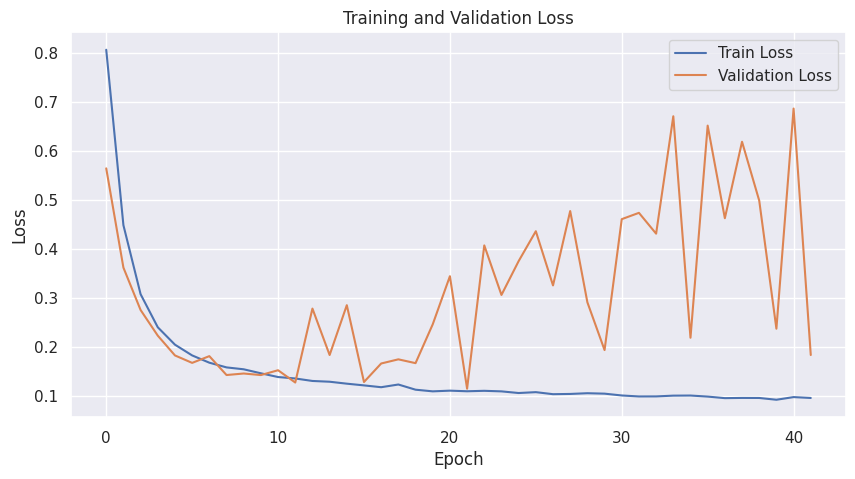


--- Classification Report - DLFFNN_6layers with Batch Normalization (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.96      0.98      0.97      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.95      0.93      0.94       773
 Brute Force       0.86      0.97      0.91       286

    accuracy                           0.96      4494
   macro avg       0.69      0.72      0.71      4494
weighted avg       0.94      0.96      0.95      4494


--- Classification Report - DLFFNN_6layers with Batch Normalization (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.98      0.97      3378
    PortScan       0.00      0.00      0.00        57
    DoS Hulk       0.94      0.95      0.95       774
 Brute Force       0.85      0.94      0.90       285

    accuracy                           0.96      4494
   macro avg       0.69      0.72      0.70      4494
weighted av

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

In [ ]:
# Deep Learning Feed Forward Neural Network - 6 layers with Batch Normalization
class DLFFNN_6layers_BatchNorm(nn.Module):
    def __init__(self, input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size):
        super(DLFFNN_6layers_BatchNorm, self).__init__()
        self.fc1 = nn.Linear(input_size, l1_size)
        self.bn1 = nn.BatchNorm1d(l1_size)
        self.fc2 = nn.Linear(l1_size, l2_size)
        self.bn2 = nn.BatchNorm1d(l2_size)
        self.fc3 = nn.Linear(l2_size, l3_size)
        self.bn3 = nn.BatchNorm1d(l3_size)
        self.fc4 = nn.Linear(l3_size, l4_size)
        self.bn4 = nn.BatchNorm1d(l4_size)
        self.fc5 = nn.Linear(l4_size, l5_size)
        self.bn5 = nn.BatchNorm1d(l5_size)
        self.fc6 = nn.Linear(l5_size, l6_size)
        self.bn6 = nn.BatchNorm1d(l6_size)
        self.fc7 = nn.Linear(l6_size, output_size)
        self.relu = nn.ReLU()


    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.bn4(x)
        x = self.relu(x)
        x = self.fc5(x)
        x = self.bn5(x)
        x = self.relu(x)
        x = self.fc6(x)
        x = self.bn6(x)
        x = self.relu(x)
        x = self.fc7(x)
        return x

# Model Initialization
input_size = X_train.shape[1]
l1_size, l2_size, l3_size, l4_size, l5_size, l6_size = 256, 128, 64, 32, 16, 16
output_size = 4

model_6layers_batchnorm = DLFFNN_6layers_BatchNorm(input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size)

# Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model_6layers_batchnorm.parameters(), lr=0.0005)

# DataLoader with Batch Size 128
train_loader_128 = DataLoader(train_dataset, batch_size=128, shuffle=True)
val_loader_128 = DataLoader(val_dataset, batch_size=128, shuffle=False)
test_loader_128 = DataLoader(test_dataset, batch_size=128, shuffle=False) # Re-using the test loader from the previous step

# Training Loop
num_epochs = 50
min_delta = 0.00001
patience = 20

training_loop(model_6layers_batchnorm, train_loader_128, val_loader_128, train_dataset, val_dataset, optimizer, criterion, num_epochs, min_delta, patience)

print("\n--- Classification Report - DLFFNN_6layers with Batch Normalization (Validation Set) ---")
generate_classification_report(model_6layers_batchnorm, val_loader_128, class_names=class_names)

print("\n--- Classification Report - DLFFNN_6layers with Batch Normalization (Test Set) ---")
generate_classification_report(model_6layers_batchnorm, test_loader_128, class_names=class_names)

### The impact of Weight Decay


In [ ]:
# Define different weight decay values to test
weight_decay_values = [0.0, 0.0001, 0.001, 0.01]


--- Training with Weight Decay: 0.0 ---
Epoch 20/50, Train Loss: 0.1210, Val Loss: 0.1317
Epoch 40/50, Train Loss: 0.1029, Val Loss: 0.1062
The function took 17.1476 seconds to execute.


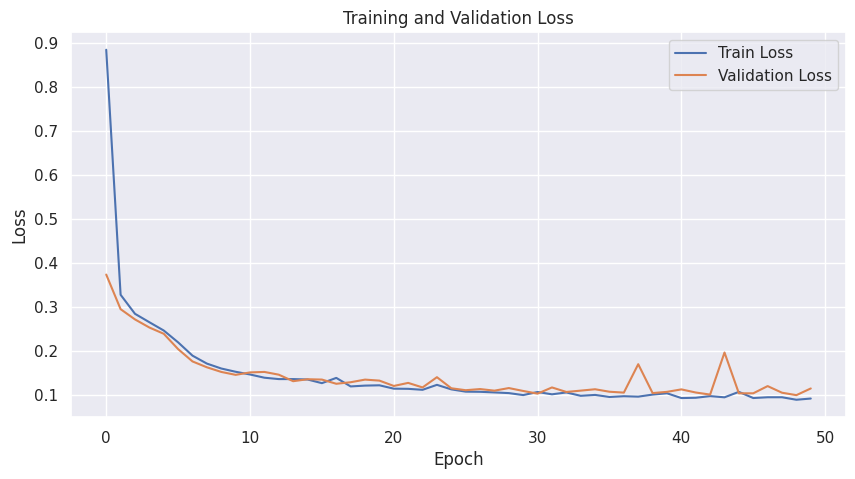


--- Classification Report for Weight Decay: 0.0 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      3378
    PortScan       0.67      0.68      0.68        57
    DoS Hulk       0.99      0.91      0.95       773
 Brute Force       0.94      0.96      0.95       286

    accuracy                           0.97      4494
   macro avg       0.89      0.89      0.89      4494
weighted avg       0.97      0.97      0.97      4494


--- Classification Report for Weight Decay: 0.0 (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.47      0.49      0.48        57
    DoS Hulk       0.98      0.93      0.95       774
 Brute Force       0.93      0.94      0.94       285

    accuracy                           0.97      4494
   macro avg       0.84      0.84      0.84      4494
weighted avg       0.97      0.97      0.97      44

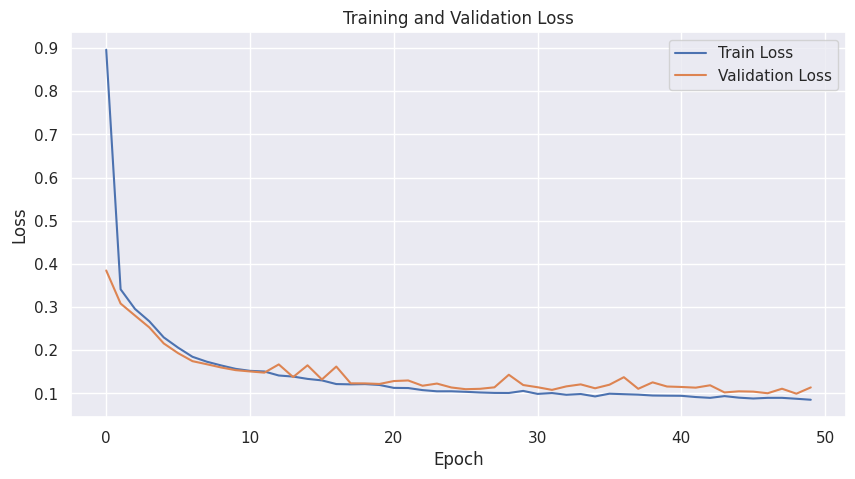


--- Classification Report for Weight Decay: 0.0001 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98      3378
    PortScan       0.81      0.82      0.82        57
    DoS Hulk       0.98      0.91      0.94       773
 Brute Force       0.93      0.97      0.95       286

    accuracy                           0.97      4494
   macro avg       0.92      0.92      0.92      4494
weighted avg       0.97      0.97      0.97      4494


--- Classification Report for Weight Decay: 0.0001 (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.74      0.79      0.76        57
    DoS Hulk       0.97      0.94      0.95       774
 Brute Force       0.94      0.94      0.94       285

    accuracy                           0.97      4494
   macro avg       0.91      0.91      0.91      4494
weighted avg       0.97      0.97      0.97  

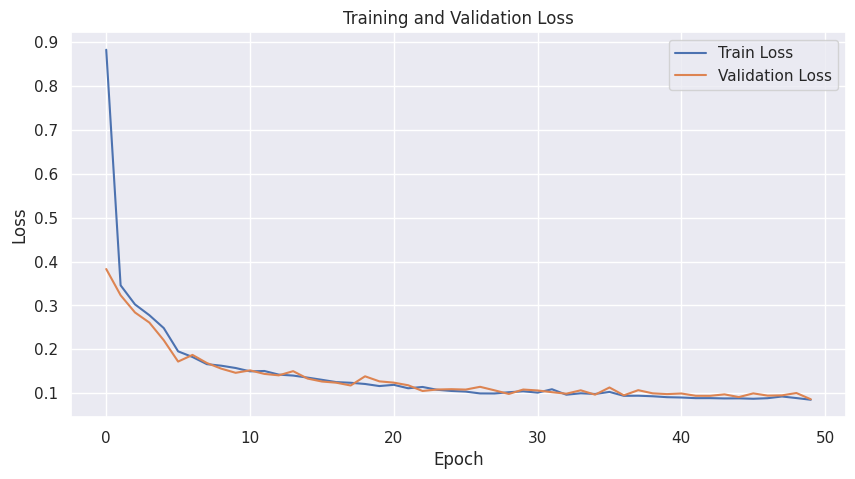


--- Classification Report for Weight Decay: 0.001 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.70      0.81      0.75        57
    DoS Hulk       0.98      0.94      0.96       773
 Brute Force       0.94      0.96      0.95       286

    accuracy                           0.97      4494
   macro avg       0.90      0.92      0.91      4494
weighted avg       0.97      0.97      0.97      4494


--- Classification Report for Weight Decay: 0.001 (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.99      0.98      3378
    PortScan       0.68      0.75      0.72        57
    DoS Hulk       0.97      0.95      0.96       774
 Brute Force       0.93      0.95      0.94       285

    accuracy                           0.97      4494
   macro avg       0.89      0.91      0.90      4494
weighted avg       0.97      0.97      0.97    

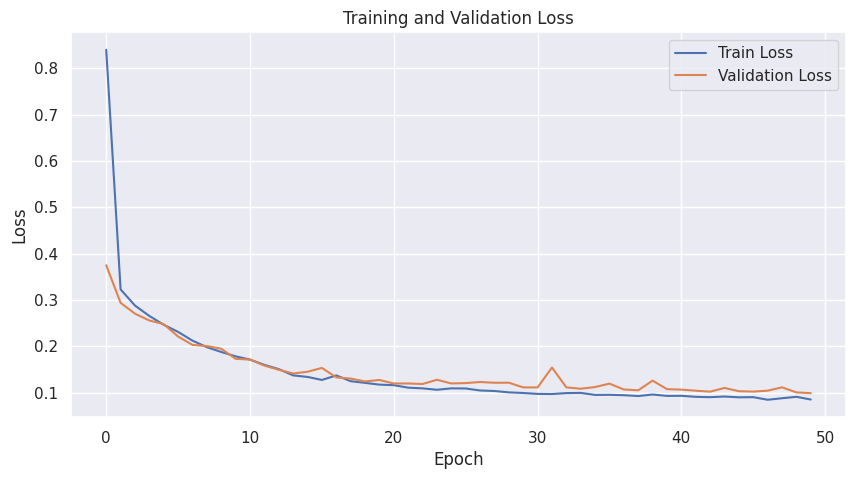


--- Classification Report for Weight Decay: 0.01 (Validation Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.58      0.81      0.68        57
    DoS Hulk       0.98      0.91      0.95       773
 Brute Force       0.93      0.97      0.95       286

    accuracy                           0.97      4494
   macro avg       0.87      0.92      0.89      4494
weighted avg       0.97      0.97      0.97      4494


--- Classification Report for Weight Decay: 0.01 (Test Set) ---
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98      3378
    PortScan       0.58      0.77      0.66        57
    DoS Hulk       0.97      0.93      0.95       774
 Brute Force       0.92      0.95      0.93       285

    accuracy                           0.97      4494
   macro avg       0.86      0.91      0.88      4494
weighted avg       0.97      0.97      0.97      

In [ ]:
# Reinitialize the best deep learning model architecture for each weight decay value
input_size = X_train.shape[1]
l1_size, l2_size, l3_size, l4_size, l5_size, l6_size = 256, 128, 64, 32, 16, 16 # Keeping the same architecture as in the previous step
output_size = 4
num_epochs = 50 # Using 50 epochs as before

for weight_decay in weight_decay_values:
    print(f"\n--- Training with Weight Decay: {weight_decay} ---")

    # Initialize the model
    model_wd = DLFFNN_6layers(input_size, l1_size, l2_size, l3_size, l4_size, l5_size, l6_size, output_size)

    # Define criterion and optimizer with the current weight decay
    criterion = nn.CrossEntropyLoss()
    optimizer_wd = optim.AdamW(model_wd.parameters(), lr=0.0005, weight_decay=weight_decay)

    # Train the model
    training_loop(model_wd, train_loader_128, val_loader_128, train_dataset, val_dataset, optimizer_wd, criterion, num_epochs, min_delta, patience)

    # Evaluate on validation set
    print(f"\n--- Classification Report for Weight Decay: {weight_decay} (Validation Set) ---")
    generate_classification_report(model_wd, val_loader_128, class_names=class_names)

    # Evaluate on test set
    print(f"\n--- Classification Report for Weight Decay: {weight_decay} (Test Set) ---")
    generate_classification_report(model_wd, test_loader_128, class_names=class_names)